<div style="background-color:#CFF; padding: 15px; border: 2px solid black;">
    <span style="font-weight:bold; color:navy; font-size:30px;">ステップ1：実行準備（ライブラリの導入）</span>
</div>

* **処理（下のコードセルで実現すること）**：本コードで使用するライブラリをimportする
* **入力（実行するために必要な情報）**：無し（以下で定義済み）
* **出力（実行後に生成される成果物）**：無し（以下のライブラリを使用できるようになる）

## ＜コードの構成（下のコードセルをクリックで選択後、「shift」+「enter」キーを押すと実行できます）＞

In [1]:
#ライブラリのimport
import os
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import re 
import time
import shutil
import shap
import locale
import seaborn as sns
import matplotlib as mpl
from dateutil.relativedelta import relativedelta
from IPython.display import display, clear_output
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from matplotlib.gridspec import GridSpec
from datetime import datetime
from PIL import Image

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


<div style="background-color:#CFF; padding: 15px; border: 2px solid black;">
    <span style="font-weight:bold; color:navy; font-size:30px;">ステップ2：実行準備（パスの定義）</span>
</div>

## ＜概要（下のコードセルの簡単な説明）＞
* **処理（下のコードセルで実現すること）**：本コードで使用する各種データセットのパスを定義。
* **入力（実行するために必要な情報）**：無し（以下で定義済み）
* **出力（実行後に生成される成果物）**：無し（パス変数の生成）

## ＜コードの構成（下のコードセルをクリックで選択後、「shift」+「enter」キーを押すと実行できます）＞


In [24]:
#生データのパス
folder_path_zaikoMB = '生データ/在庫推移MB'
folder_path_LTMB = '生データ/所在管理MB'
folder_path_kumitate = '生データ/組立実績MB'
folder_path_tehaisu = '生データ/手配必要数'
folder_path_tehaiunyo = '生データ/手配運用情報'
folder_path_pitch = '生データ/不等ピッチ係数'
folder_path_kotei = '生データ/使用工程'
#中間成果物のパス
folder_path_interproduct = '中間成果物'
file_path_zaikodata = '中間成果物/在庫推移MBデータ_統合済.csv'
file_path_LTdata = '中間成果物/所在管理MBデータ_統合済.csv'
file_path_kumitate = '中間成果物/組立実績MBデータ_統合済.csv'
file_path_pitch = '中間成果物/不等ピッチデータ_統合済.csv'
file_path_kotei = '中間成果物/使用工程データ_統合済.csv'
file_path_date= '中間成果物/日付ファイル_開始日と終了日記載.txt'
file_path_zaikodata_extract = '中間成果物/在庫推移MBデータ_統合済&特定日時抽出済.csv'
file_path_LTdata_extract = '中間成果物/所在管理MBデータ_統合済&特定日時抽出済.csv'
file_path_kumitate_extract = '中間成果物/組立実績MBデータ_統合済&特定日時抽出済.csv'
file_path_tehaisu_with_tehaiunyo = '中間成果物/手配数データ_手配運用情報統合済'#.csvいらない
file_path_LTdata_extract_with_tehaisu = '中間成果物/所在管理MBデータ_統合済&特定日時抽出済&手配数と手配運用情報統合済.csv'
file_path_weekly_data = '中間成果物/週単位のデータ.csv'
file_path_weekly_data_with_kumitate = '中間成果物/週単位のデータ_組立統合済.csv'
file_path_weekly_data_with_kumitate_and_pitch = '中間成果物/週単位のデータ_組立&不等ピッチ統合済.csv'
file_path_weekly_data_with_kumitate_and_pitch_and_kotei = '中間成果物/週単位のデータ_組立&不等ピッチ＆使用工程統合済.csv'
file_path_weekly_data_with_kumitate_and_pitch_and_kotei_and_others = '中間成果物/週単位のデータ_組立&不等ピッチ＆使用工程統合済＆必要変数追記.csv'
file_path_weekly_data_with_kumitate_and_pitch_and_kotei_and_others_cleaned = '中間成果物/週単位のデータ_組立&不等ピッチ績＆使用工程統合済＆必要変数追記_クリーニング済.csv'
#最終成果物のパス
folder_path_finalproduct = '最終成果物'

<div style="background-color:#CFF; padding: 10px; border: 2px solid black;">
    <span style="font-weight:bold; color:navy; font-size:30px;">ステップ3：データの集約（在庫推移MotionBoard）</span>
</div>

## ＜概要（下のコードセルの簡単な説明）＞
* **処理（下のコードセルで実現すること）**：在庫推移MotionBoardから出力した１つ以上のCSVファイルを１つに集約し、新たなファイルとして保存。
* **入力（実行するために必要な情報）**：在庫推移MotionBoardから出力した１つ以上のCSVファイル（生データ/在庫推移MB/***（任意の名前）.csv）。
* **出力（実行後に生成される成果物）**：在庫推移MotionBoardから出力した１つ以上のCSVファイルを集約した単一のCSVファイル（中間成果物/在庫推移MBデータ_統合済.csv）。

## ＜前準備（<span style="background-color:yellow;">下のコードセルの実行にはこの準備が必要です</span>）＞
1. 在庫推移MotionBoardにアクセスする：[在庫推移MotionBoardリンク](http://10.88.11.58:18081/MBSF/main?id=b9154fd0-6fe6-d153-7d17-053da4c333ea&mbid=fidtnjir4nq3ja63cqcaaafmoqcx4&boardpath=%2FMSR%2F%E8%87%AA%E5%8B%95%E3%83%A9%E3%83%83%E3%82%AF%2FT403%E7%89%A9%E6%B5%81%E6%83%85%E5%A0%B1_%E5%9C%A8%E5%BA%AB%E6%8E%A8%E7%A7%BB)
2. 左上の「表示期間」で押下し、
3. 日付を選択する　※1週間以上選択すると処理落ちするみたいです。面倒ですが、１週間毎にデータを用意してください。
4. 左下の「CSV出力」を押下
5. エンコード「Shift_JIS」を選択後、「ダウンロード」を押下
6. ダウンロードしたCSVデータを指定の置き場（生データ/在庫推移MBフォルダー）に格納する

## ＜コードの構成（実行する際は、下のコードセルをクリックで選択後、「shift」+「enter」キーを押してください）＞

In [3]:
# フォルダー内の全てのCSVファイルを見つける
csv_files_zaikoMB = [f for f in os.listdir(folder_path_zaikoMB) if f.endswith('.csv')]

# フォルダー内にCSVファイルが存在する場合
if len(csv_files_zaikoMB) != 0:

    # 統合結果を保存するための空のDataFrameを作成
    merged_df_zaiko = pd.DataFrame()
    # CSVファイルをDataFrameに読み込んでリストに保存
    for file in csv_files_zaikoMB:
        file_path = os.path.join(folder_path_zaikoMB, file)
        df_zaiko = pd.read_csv(file_path, encoding='Shift_JIS')
        merged_df_zaiko = pd.concat([merged_df_zaiko, df_zaiko], ignore_index=True)
        
    #データに重複があれば削除
    merged_df_zaiko_unique =  merged_df_zaiko.drop_duplicates(subset=['計測日時', '品番'])
    
    #成功メッセージ
    print("\033[34m" + "実行は成功しました！\n次のステップを実行してください!" + "\033[0m")
    print(f"{len(csv_files_zaikoMB)}つのCSVファイルが見つかりました！\n以下に統合したデータの一部を表示します(重複したデータは削除済みです)")

    # 統合したデータを新しいCSVファイルに保存
    with open(file_path_zaikodata, mode='w',newline='', encoding='shift_jis',errors='ignore') as f:
        merged_df_zaiko_unique.to_csv(f)

    #作成したDataFrameの内容を確認
    display(merged_df_zaiko_unique)
    
# フォルダー内にCSVファイルが存在しない場合    
else:
    #失敗メッセージ
    print("\033[31m" + "実行は失敗しました！" + "\033[31m")
    print("CSVファイルが見つかりません！CSVファイルを格納してください")

実行は成功しました！
次のステップを実行してください!
4つのCSVファイルが見つかりました！
以下に統合したデータの一部を表示します(重複したデータは削除済みです)


,計測日時,品番,拠点所番地,在庫数（箱）,入庫数（箱）,出庫数（箱）,Unnamed: 0
0,2023/12/11 00:00:00,019120LC030,30113,11.0,0.0,0.0,NaN
1,2023/12/11 00:00:00,019120LC050,20115,5.0,0.0,0.0,NaN
2,2023/12/11 00:00:00,019120LC060,30116,10.0,0.0,0.0,NaN
3,2023/12/11 00:00:00,019120LC070,20117,11.0,0.0,0.0,NaN
4,2023/12/11 00:00:00,019128GA010,50460,26.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...
92844,2023/12/24 23:00:00,G9201ECE010,50446,50.0,0.0,0.0,NaN
92845,2023/12/24 23:00:00,G9351ECB010,20409,NaN,NaN,NaN,NaN
92846,2023/12/24 23:00:00,G9351ECE010,20406,5.0,0.0,0.0,NaN
92847,2023/12/24 23:00:00,Y021720076*****,30121,4.0,0.0,0.0,NaN


<div style="background-color:#CFF; padding: 15px; border: 2px solid black;">
    <span style="font-weight:bold; color:navy; font-size:30px;">ステップ4：データの集約（所在管理MotionBoard）</span>
</div>

## ＜概要（下のコードセルの簡単な説明）＞
* **処理（下のコードセルで実現すること）**：所在管理MotionBoardから出力した１つ以上のCSVファイルを１つに集約し、新たなファイルとして保存。
* **入力（実行するために必要な情報）**：所在管理MotionBoardから出力した１つ以上のCSVファイル（生データ/所在管理MB/***（任意の名前）.csv）。
* **出力（実行後に生成される成果物）**：所在管理MotionBoardから出力した１つ以上のCSVファイルを集約した単一のCSVファイル（中間成果物/所在管理MBデータ_統合済.csv）。

## ＜前準備（<span style="background-color:yellow;">下のコードセルの実行にはこの準備が必要です</span>）＞
1. 所在管理MotionBoardにアクセス：[所在管理MotionBoardリンク](http://10.88.11.58:18081/MBSF/main?id=8045ec22-9e62-92c7-5e1e-077d35e5dc33&mbid=fidepnyfuff3ra63kitaaae3ywjmi&boardpath=%2FMSR%2F%E8%87%AA%E5%8B%95%E3%83%A9%E3%83%83%E3%82%AF%2FT403%E7%89%A9%E6%B5%81%E6%83%85%E5%A0%B1_v2)
2. 右上の「サブフィルター表示」押下
3. 整備室コード「1Y」を選択
4. 「CSVダウンロード」を押下
5. エンコード「Shift_JIS」を選択後、「ダウンロード」を押下
6. ダウンロードしたCSVデータを指定の置き場（生データ/所在管理MBフォルダー）に格納する

## ＜コードの構成（実行する際は、下のコードセルをクリックで選択後、「shift」+「enter」キーを押してください）＞

In [65]:
# フォルダー内の全てのCSVファイルを見つける
csv_files_LTMB = [f for f in os.listdir(folder_path_LTMB) if f.endswith('.csv')]

# フォルダー内にCSVファイルが存在する場合
if len(csv_files_LTMB) != 0:
    
    # 統合結果を保存するための空のDataFrameを作成
    merged_df_LT = pd.DataFrame()
    # CSVファイルをDataFrameに読み込んでリストに保存
    for file in csv_files_LTMB:
        file_path = os.path.join(folder_path_LTMB, file)
        df_LT = pd.read_csv(file_path, encoding='Shift_JIS',dtype=str)
        merged_df_LT = pd.concat([merged_df_LT, df_LT], ignore_index=True)
        
    #重複があれば削除
    merged_df_LT_unique =  merged_df_LT.drop_duplicates(subset=['かんばんシリアル', '伝票番号','品番'])

    # 不要な特定の列を削除
    merged_df_LT_unique = merged_df_LT_unique.drop("伝票番号", axis=1)
    merged_df_LT_unique = merged_df_LT_unique.drop("拠点所番地", axis=1)
    merged_df_LT_unique = merged_df_LT_unique.drop("組立投入日時", axis=1)
    merged_df_LT_unique = merged_df_LT_unique.drop("発注取消日時", axis=1)
    merged_df_LT_unique = merged_df_LT_unique.drop("発注〜組立LT", axis=1)
    merged_df_LT_unique = merged_df_LT_unique.drop("長期滞留フラグ", axis=1)

    # 特定の文字列を含む行を削除する
    target_string = "< NULL >"
    merged_df_LT_unique = merged_df_LT_unique[~merged_df_LT_unique.apply(lambda x: x.str.contains(target_string)).any(axis=1)]
    
    #成功メッセージ
    print("\033[34m" + "実行は成功しました！\n次のステップを実行してください!" + "\033[0m")
    print(f"{len(csv_files_LTMB)}つのCSVファイルが見つかりました！\n以下に統合したデータの外観を示します(重複したデータは削除済みです)")

    # 統合したデータを新しいCSVファイルに保存
    with open(file_path_LTdata, mode='w',newline='', encoding='shift_jis',errors='ignore') as f:
        merged_df_LT_unique.to_csv(f)

    #作成したDataFrameの内容を確認
    display(merged_df_LT_unique)

# フォルダー内にCSVファイルが存在しない場合    
else:
    #失敗メッセージ
    print("\033[31m" + "実行は失敗しました！" + "\033[31m")
    print("CSVファイルが見つかりません！CSVファイルを格納してください")

実行は成功しました！
次のステップを実行してください!
11つのCSVファイルが見つかりました！
以下に統合したデータの外観を示します(重複したデータは削除済みです)


,かんばんシリアル,品番,品名,収容数,仕入先名,仕入先工場名,ステータス,納入日,納入便,発注日時,...,検収日時,順立装置入庫日時,順立装置出庫日時,回収日時,発注〜印刷LT,発注〜検収LT,発注〜順立装置入庫LT,発注〜順立装置出庫LT,発注〜回収LT,更新日時
4231,1Z23M00076171,3040052001B,ﾌﾟﾗｸﾞｳｲｽﾞﾍﾂﾄﾞｽﾄﾚ-ﾄｽｸﾘﾕ-,500,（株）青山製作所,NaN,回収済,2023/12/25,06,2023/12/22 23:26:30,...,2023/12/26 03:05:57,2023/12/26 06:01:22,2023/12/26 15:51:48,2024/01/24 10:01:03,0.19,3.15,3.27,3.68,32.44,2024/01/24 10:01:03
5390,1Z23M00079078,5040056001E,ｸﾗﾝﾌﾟﾁﾕ-ﾌﾞ,300,サトープレス工業（株）,本社工場,回収済,2023/12/28,01,2023/12/26 11:33:45,...,2023/12/28 10:18:13,2023/12/28 14:23:41,2023/12/28 16:54:59,2024/01/24 07:43:40,0.12,1.95,2.12,2.22,28.84,2024/01/24 07:43:40
5391,1Z23M00050078,5040056001E,ｸﾗﾝﾌﾟﾁﾕ-ﾌﾞ,300,サトープレス工業（株）,本社工場,回収済,2023/12/22,01,2023/12/20 11:44:29,...,2023/12/22 10:20:01,2023/12/22 16:38:02,2023/12/22 22:16:29,2024/01/24 07:43:40,0.11,1.94,2.2,2.44,34.83,2024/01/24 07:43:40
6294,1Z23K00062379,9056451A088,ｼﾑ,100,（株）ムロコーポレーション,NaN,回収済,2023/10/24,01,2023/10/24 06:14:49,...,2023/10/25 02:50:56,2023/10/25 05:03:22,2023/11/24 14:18:54,2024/01/24 03:52:58,0.09,0.86,0.95,31.34,91.9,2024/01/24 03:52:58
10590,1Z23M00026848,35174ECE020,ﾌﾟﾚｰﾄｵｲﾙﾘｻﾞｰﾊﾞｰﾛｯｸ,90,（株）浅賀井製作所,安城工場,回収済,2023/12/13,03,2023/12/12 03:44:41,...,2023/12/13 21:08:01,2023/12/14 03:23:33,2023/12/15 04:16:33,2024/01/23 01:09:05,0.28,1.72,1.99,3.02,41.89,2024/01/23 01:09:05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356768,1Z23G00047254,G1250ECE010,"ﾊﾟｲﾌﾟASSY,ﾓｰﾀｰｸｰﾘﾝｸﾞ",60,（株）バルカー,豊田営業所,回収済,2023/07/21,01,2023/07/18 03:42:22,...,2023/07/21 09:17:16,2023/07/21 15:19:33,2023/07/24 11:08:56,2023/07/24 22:54:33,0.38,3.23,3.48,6.31,6.8,2023/08/30 11:13:00
356769,1Z23G00047253,G1250ECB010,"ﾊﾟｲﾌﾟASSY,ﾓｰﾀｰｸﾘｰﾆﾝｸﾞNO.1",60,（株）バルカー,豊田営業所,回収済,2023/07/21,01,2023/07/18 03:42:22,...,2023/07/21 09:17:16,2023/07/21 15:19:49,2023/07/22 04:47:29,2023/07/24 15:20:42,0.38,3.23,3.48,4.05,6.48,2023/08/30 11:13:00
357135,1Z23G00046521,G1250ECE010,"ﾊﾟｲﾌﾟASSY,ﾓｰﾀｰｸｰﾘﾝｸﾞ",60,（株）バルカー,豊田営業所,回収済,2023/07/21,01,2023/07/18 03:42:22,...,2023/07/21 09:17:16,2023/07/21 15:19:25,2023/07/22 04:30:37,2023/07/24 15:20:43,0.38,3.23,3.48,4.03,6.48,2023/08/30 11:13:00
357340,1Z23G00046204,G1250ECE010,"ﾊﾟｲﾌﾟASSY,ﾓｰﾀｰｸｰﾘﾝｸﾞ",60,（株）バルカー,豊田営業所,回収済,2023/07/21,01,2023/07/18 03:42:22,...,2023/07/21 09:17:16,2023/07/21 15:19:37,2023/07/27 22:52:24,2023/07/28 04:17:23,0.38,3.23,3.48,9.8,10.02,2023/08/30 11:13:00


<div style="background-color:#CFF; padding: 15px; border: 2px solid black;">
    <span style="font-weight:bold; color:navy; font-size:30px;">ステップ5：データの集約（組立実績MotionBoard）</span>
</div>

## ＜概要（下のコードセルの簡単な説明）＞
* **処理（下のコードセルで実現すること）**：組立実績MotionBoardから出力した１つ以上のCSVファイルを１つに集約し、新たなファイルとして保存。
* **入力（実行するために必要な情報）**：組立実績MotionBoardから出力した１つ以上のCSVファイル（生データ/組立実績MB/***（任意の名前）.csv）。
* **出力（実行後に生成される成果物）**：組立実績MotionBoardから出力した１つ以上のCSVファイルを集約した単一のCSVファイル（中間成果物/組立実績MBデータ_統合済.csv）。

## ＜前準備（<span style="background-color:yellow;">下のコードセルの実行にはこの準備が必要です</span>）＞
1. MotionBoardを開く(利用登録が必要です）：[MotionBoardリンク](http://10.88.11.113:8787/motionboard/main?mbid=fidavebv2l6yza65l6eaaagkxsvk4&boardpath=%2F%5BMy%20Boards%5D%2FAI2%2F1082794-Z100%2F%E7%B5%84%E7%AB%8B%E7%A8%BC%E5%83%8D%E7%8E%87%EF%BC%88%E5%AE%9F%E7%B8%BE%EF%BC%89)
2. マイボードで「新規作成」を押下
3. 「OK」を押下
4. 接続先「MRE_Oracle」を押下
5. 「SA」を押下
6. 「T_KANRIBAN_JISSEKI_TBL」を押下
7. 「次へ」を押下
8. 「OK」を押下
9. 「赤枠」をクリック
10. 「CSVデータをダウンロード」押下
11. エンコード「Shift_JIS」を選択後、「ダウンロード」を押下
12. ダウンロードしたCSVデータを指定の置き場（生データ/所在管理MBフォルダー）に格納する

用意したCSVデータを指定の置き場（生データ/組立実績MBフォルダー）に格納する
➀「サブフィルターを表示」押下
➁1Yを設定
➂SHIftjisでダウンロード

## ＜コードの構成（実行する際は、下のコードセルをクリックで選択後、「shift」+「enter」キーを押してください）＞

In [64]:
# フォルダー内の全てのCSVファイルを見つける
csv_files_kumitateMB = [f for f in os.listdir(folder_path_kumitate) if f.endswith('.csv')]


# フォルダー内にCSVファイルが存在する場合
if len(csv_files_kumitateMB) != 0:
    
    #成功メッセージ
    print("\033[34m" + "実行は成功しました！\n次のステップを実行してください!" + "\033[0m")
    print(f"{len(csv_files_kumitateMB)}つのファイルが見つかりました！")

    # 統合結果を保存するための空のDataFrameを作成
    merged_df_kumitate = pd.DataFrame()
    # CSVファイルをDataFrameに読み込んでリストに保存
    for file in csv_files_kumitateMB:
        file_path = os.path.join(folder_path_kumitate, file)
        df_kumitate = pd.read_csv(file_path, encoding='cp932')
        merged_df_kumitate = pd.concat([merged_df_kumitate, df_kumitate], ignore_index=True)
    
    #重複があれば削除
    merged_df_kumitate_unique =  merged_df_kumitate.drop_duplicates(subset=['KUMI_CD', 'LINE_DATE'])

    # 統合したデータを新しいCSVファイルに保存
    with open(file_path_kumitate, mode='w',newline='', encoding='shift_jis',errors='ignore') as f:
        merged_df_kumitate_unique.to_csv(f)

    #作成したDataFrameの内容を確認
    display(merged_df_kumitate_unique[1:10])

# フォルダー内にCSVファイルが存在しない場合    
else:
    #失敗メッセージ
    print("\033[31m" + "実行は失敗しました！" + "\033[31m")
    print("CSVファイルが見つかりません！CSVファイルを格納してください")

実行は成功しました！
次のステップを実行してください!
12つのファイルが見つかりました！


,KUMI_CD,LINE_CD,LINE_SUB_CD,KANRIBAN_CD,LINE_DATE,TYOKU_KBN,OFFICE_HOURS,WORKING_HOURS,LINE_START_TIME,LINE_END_TIME,...,KANRIBAN_STAFF_CD,CREATE_STAFF_CD,CREATE_TIME,UPDATE_STAFF_CD,UPDATE_TIME,FIRST_SERIAL_NO,KANSEI_SHOUNIN_STAFF,AUTHOR,PDF_NAME,HUB_CD
1,AP11,AS5561,A,M02,2023/04/12 00:00:00,2,690,0.0,< NULL >,< NULL >,...,SYS_TT,M02,2023/04/12 08:00:15,SYS_TT,2023/04/12 08:15:09,< NULL >,< NULL >,< NULL >,< NULL >,IA000
2,AP11,AS5561,A,M02,2023/04/13 00:00:00,2,690,0.0,< NULL >,< NULL >,...,SYS_TT,M02,2023/04/13 08:00:15,SYS_TT,2023/04/13 08:15:10,< NULL >,< NULL >,< NULL >,< NULL >,IA000
3,AP11,AS5561,A,M02,2023/04/14 00:00:00,2,690,0.0,< NULL >,< NULL >,...,SYS_TT,M02,2023/04/14 08:00:14,SYS_TT,2023/04/14 08:15:09,< NULL >,< NULL >,< NULL >,< NULL >,IA000
4,AP11,AS5561,A,M02,2023/04/15 00:00:00,2,690,0.0,2023/04/15 22:00:00,< NULL >,...,SYS_TT,M02,2023/04/15 08:00:09,SYS_TT,2023/04/15 08:15:09,< NULL >,< NULL >,< NULL >,< NULL >,IA000
5,AP11,AS5561,A,M02,2023/04/16 00:00:00,1,750,0.0,2023/04/16 08:30:00,< NULL >,...,SYS_TT,M02,2023/04/16 08:00:08,SYS_TT,2023/04/16 08:15:08,< NULL >,< NULL >,< NULL >,< NULL >,IA000
6,AP11,AS5561,A,M02,2023/04/17 00:00:00,1,750,0.0,< NULL >,< NULL >,...,SYS_TT,M02,2023/04/17 08:00:08,SYS_TT,2023/04/17 08:15:09,< NULL >,< NULL >,< NULL >,< NULL >,IA000
7,AP11,AS5561,A,M02,2023/04/18 00:00:00,1,750,412.0,2023/04/18 08:30:00,2023/04/18 17:07:00,...,32335,M02,2023/04/18 08:00:10,32335,2023/04/20 09:33:02,< NULL >,32335,38016,< NULL >,IA000
8,AP11,AS5561,A,M02,2023/04/19 00:00:00,1,750,419.0,2023/04/19 08:30:00,2023/04/19 18:28:00,...,32335,M02,2023/04/19 08:00:10,32335,2023/04/20 09:37:40,< NULL >,32335,39704,< NULL >,IA000
9,AP11,AS5561,A,M02,2023/04/20 00:00:00,1,750,70.0,2023/04/20 08:30:00,2023/04/20 09:51:00,...,32335,M02,2023/04/20 08:00:11,32335,2023/04/24 10:18:15,< NULL >,32335,38016,< NULL >,IA000


<div style="background-color:#CFF; padding: 15px; border: 2px solid black;">
    <span style="font-weight:bold; color:navy; font-size:30px;">ステップ6：データの集約（手配数）</span>
</div>

## ＜概要（下のコードセルの簡単な説明）＞
* **処理（下のコードセルで実現すること）**：手配必要数CSVファイルの確認
* **入力（実行するために必要な情報）**：手配必要数CSVファイル（生データ/手配必要数/ファイル名の最初の6文字がYYYYMM.csv、例：202309_手配数_1Y_7次.csv）
* **出力（実行後に生成される成果物）**：無し（ファイルパス変数を生成）

## ＜前準備（<span style="background-color:yellow;">下のコードセルの実行にはこの準備が必要です</span>）＞
1. 手配数CSVファイルを用意する
2. 用意したCSVデータを指定の置き場（生データ/手配必要数）に格納する

## ＜コードの構成（実行する際は、下のコードセルをクリックで選択後、「shift」+「enter」キーを押してください）＞

In [6]:
# フォルダー内の全てのCSVファイルを見つける
csv_files_tehaisu = [f for f in os.listdir(folder_path_tehaisu) if f.endswith('.csv')]
year_tehaisu = [file[2:4] for file in os.listdir(folder_path_tehaisu) if file.endswith(".csv")]
month_tehaisu = [file[4:6].replace("0", "") for file in os.listdir(folder_path_tehaisu) if file.endswith(".csv")]

# フォルダー内にCSVファイルが存在する場合
if len(csv_files_tehaisu) != 0:
    
    #成功メッセージ
    print("\033[34m" + "実行は成功しました！\n次のステップを実行してください!" + "\033[0m")
    
    print(f"{len(csv_files_tehaisu)}つのファイルが見つかりました！")
    for i in range(len(year_tehaisu)):
        print(f"{year_tehaisu[i]}年の{month_tehaisu[i]}月のデータが見つかりました！") 
        
# フォルダー内にCSVファイルが存在しない場合    
else:
    #失敗メッセージ
    print("\033[31m" + "実行は失敗しました！" + "\033[31m")
    print("CSVファイルが見つかりません！CSVファイルを格納してください")

実行は成功しました！
次のステップを実行してください!
1つのファイルが見つかりました！
23年の12月のデータが見つかりました！


<div style="background-color:#CFF; padding: 15px; border: 2px solid black;">
    <span style="font-weight:bold; color:navy; font-size:30px;">ステップ7：データの集約（手配運用情報）</span>
</div>

## ＜概要（下のコードセルの簡単な説明）＞
* **処理（下のコードセルで実現すること）**：手配運用情報CSVファイルの確認
* **入力（実行するために必要な情報）**：手配運用情報CSVファイル（生データ/手配必要数/ファイル名に手配運用情報YYMMが含まれる.csv、例：XR10_手配運用情報230812 1Y.csv）
* **出力（実行後に生成される成果物）**：無し（ファイルパス変数を生成）

## ＜前準備（<span style="background-color:yellow;">下のコードセルの実行にはこの準備が必要です</span>）＞
1. 手配運用情報CSVファイルを用意する
2. 用意したCSVデータを指定の置き場（生データ/手配運用情報）に格納する

## ＜コードの構成（実行する際は、下のコードセルをクリックで選択後、「shift」+「enter」キーを押してください）＞

In [7]:
csv_files_tehaiunyo = [f for f in os.listdir(folder_path_tehaiunyo) if f.endswith('.csv')]

# フォルダー内にCSVファイルが存在する場合
if len(csv_files_tehaiunyo) != 0:
    
    #成功メッセージ
    print("\033[34m" + "実行は成功しました！\n次のステップを実行してください!" + "\033[0m")
    print(f"{len(csv_files_tehaiunyo)}つのファイルが見つかりました！")

    pattern = r"手配運用情報(\d+)"
    results = []
    for file in csv_files_tehaiunyo:
        match = re.search(pattern, file)
        if match:
            results.append(match.group(1))

    year_tehaiunyo = [file[0:2] for file in results]
    month_tehaiunyo = [file[2:4].replace("0", "") for file in results]

    for i in range(len(year_tehaiunyo)):
        print(f"{year_tehaiunyo[i]}年の{month_tehaiunyo[i]}月のデータが見つかりました！") 

# フォルダー内にCSVファイルが存在しない場合    
else:
    #失敗メッセージ
    print("\033[31m" + "実行は失敗しました！" + "\033[31m")
    print("CSVファイルが見つかりません！CSVファイルを格納してください")

実行は成功しました！
次のステップを実行してください!
2つのファイルが見つかりました！
23年の8月のデータが見つかりました！
23年の12月のデータが見つかりました！


<div style="background-color:#CFF; padding: 15px; border: 2px solid black;">
    <span style="font-weight:bold; color:navy; font-size:30px;">ステップ8：データの集約（不等ピッチ）</span>
</div>

## ＜概要（下のコードセルの簡単な説明）＞
* **処理（下のコードセルで実現すること）**：１つ以上の不等ピッチCSVファイルを１つに集約し、新たなファイルとして保存。
* **入力（実行するために必要な情報）**：１つ以上の不等ピッチCSVファイル（生データ/不等ピッチ係数/***（任意の名前）.csv）。
* **出力（実行後に生成される成果物）**：１つ以上の不等ピッチCSVファイルを集約した単一のCSVファイル（中間成果物/不等ピッチデータ_統合済.csv）。

## ＜前準備（<span style="background-color:yellow;">下のコードセルの実行にはこの準備が必要です</span>）＞
1. 不等ピッチCSVファイルを用意する（「仕入先名」「発送場所名」「納入先」の情報を用意してください）
2. 用意したCSVデータを指定の置き場（生データ/不等ピッチ係数）に格納する

## ＜コードの構成（実行する際は、下のコードセルをクリックで選択後、「shift」+「enter」キーを押してください）＞

In [8]:
csv_files_pitch = [f for f in os.listdir(folder_path_pitch) if f.endswith('.csv')]

# フォルダー内にCSVファイルが存在する場合
if len(csv_files_pitch) != 0:
    
    #成功メッセージ
    print("\033[34m" + "実行は成功しました！\n次のステップを実行してください!" + "\033[0m")
    print(f"{len(csv_files_pitch)}つのファイルが見つかりました！")
    
    # 統合結果を保存するための空のDataFrameを作成
    merged_df_pitch = pd.DataFrame()
    # CSVファイルをDataFrameに読み込んでリストに保存
    for file in csv_files_pitch:
        file_path = os.path.join(folder_path_pitch, file)
        df_pitch = pd.read_csv(file_path, encoding='Shift_JIS',dtype=str)
        merged_df_pitch = pd.concat([merged_df_pitch, df_pitch], ignore_index=True)
    
    #重複があれば削除
    merged_df_pitch_unique =  merged_df_pitch.drop_duplicates(subset=['仕入先名', '発送場所名','納入先'])
        
    # 統合したデータを新しいCSVファイルに保存
    with open(file_path_pitch, mode='w',newline='', encoding='shift_jis',errors='ignore') as f:
        merged_df_pitch_unique.to_csv(f)

# フォルダー内にCSVファイルが存在しない場合    
else:
    #失敗メッセージ
    print("\033[31m" + "実行は失敗しました！" + "\033[31m")
    print("CSVファイルが見つかりません！CSVファイルを格納してください")

実行は成功しました！
次のステップを実行してください!
1つのファイルが見つかりました！


<div style="background-color:#CFF; padding: 15px; border: 2px solid black;">
    <span style="font-weight:bold; color:navy; font-size:30px;">ステップ9：データの集約（使用工程）</span>
</div>

## ＜概要（下のコードセルの簡単な説明）＞
* **処理（下のコードセルで実現すること）**：１つ以上の使用工程CSVファイルを１つに集約し、新たなファイルとして保存。
* **入力（実行するために必要な情報）**：１つ以上の使用工程CSVファイル（生データ/使用工程/***（任意の名前）.csv）。
* **出力（実行後に生成される成果物）**：１つ以上の使用工程CSVファイルを集約した単一のCSVファイル（中間成果物/使用工程データ_統合済.csv）。

## ＜前準備（<span style="background-color:yellow;">下のコードセルの実行にはこの準備が必要です</span>）＞
1. 使用工程CSVファイルを用意する（「品番」「使用工程」の情報を用意してください）
2. 用意したCSVデータを指定の置き場（生データ/使用工程）に格納する

## ＜コードの構成（実行する際は、下のコードセルをクリックで選択後、「shift」+「enter」キーを押してください）＞

In [9]:
csv_files_kotei = [f for f in os.listdir(folder_path_kotei) if f.endswith('.csv')]

# フォルダー内にCSVファイルが存在する場合
if len(csv_files_kotei) != 0:
    
    #成功メッセージ
    print("\033[34m" + "実行は成功しました！\n次のステップを実行してください!" + "\033[0m")
    print(f"{len(csv_files_kotei)}つのファイルが見つかりました！")
    
    # 統合結果を保存するための空のDataFrameを作成
    merged_df_kotei = pd.DataFrame()
    # CSVファイルをDataFrameに読み込んでリストに保存
    for file in csv_files_kotei:
        file_path = os.path.join(folder_path_kotei, file)
        df_kotei = pd.read_csv(file_path, encoding='Shift_JIS',dtype=str)
        merged_df_kotei = pd.concat([merged_df_kotei, df_kotei], ignore_index=True)
    
    #重複があれば削除
    merged_df_kotei_unique =  merged_df_kotei.drop_duplicates(subset=['品番'])
        
    # 統合したデータを新しいCSVファイルに保存
    with open(file_path_kotei, mode='w',newline='', encoding='shift_jis',errors='ignore') as f:
        merged_df_kotei_unique.to_csv(f)

# フォルダー内にCSVファイルが存在しない場合    
else:
    #失敗メッセージ
    print("\033[31m" + "実行は失敗しました！" + "\033[31m")
    print("CSVファイルが見つかりません！CSVファイルを格納してください")

実行は成功しました！
次のステップを実行してください!
1つのファイルが見つかりました！


<div style="background-color:#CFF; padding: 15px; border: 2px solid black;">
    <span style="font-weight:bold; color:navy; font-size:30px;">ステップ10：データの抽出（特定日時入力）</span>
</div>

## ＜概要（下のコードセルの簡単な説明）＞
* **処理（下のコードセルで実現すること）**：ユーザーにキーボード入力を要求し、特定の日付範囲を入力
* **入力（実行するために必要な情報）**：任意の日付範囲（ユーザーのキーボード入力）
* **出力（実行後に生成される成果物）**：入力した日付範囲を記録したテキストファイル（中間成果物/日付ファイル_開始日と終了日記載.txt）


## ＜コードの構成（実行する際は、下のコードセルをクリックで選択後、「shift」+「enter」キーを押してください）＞

In [10]:
# ユーザーからの入力を受け付けて特定の日付範囲のDataFrameを取り出す
start_date_input = input("You：開始日を入力してください（YYYY-MM-DD）: ")
end_date_input = input("You：終了日を入力してください（YYYY-MM-DD）: ")

#日付範囲の記録用ファイル作成
with open(file_path_date, 'w') as file:
    file.write("開始日:"+start_date_input)
    file.write("\n")
    file.write("終了日:"+end_date_input)

You：開始日を入力してください（YYYY-MM-DD）:  2023-12-04
You：終了日を入力してください（YYYY-MM-DD）:  2023-12-17


<div style="background-color:#CFF; padding: 15px; border: 2px solid black;">
    <span style="font-weight:bold; color:navy; font-size:30px;">ステップ11：データの確認（在庫推移MotionBoard）</span>
</div>

## ＜概要（下のコードセルの簡単な説明）＞
* **処理（下のコードセルで実現すること）**：ステップ3で生成した「中間成果物/在庫推移MBデータ_統合済.csv」から特定日付範囲のデータを抽出し、新しいファイルに保存
* **入力（実行するために必要な情報）**：中間成果物/在庫推移MBデータ_統合済.csv
* **出力（実行後に生成される成果物）**：特定日付範囲のデータを抽出した在庫推移MBデータ_統合済.csv（中間成果物/在庫推移MBデータ_統合済&特定日時抽出済.csv）


## ＜コードの構成（実行する際は、下のコードセルをクリックで選択後、「shift」+「enter」キーを押してください）＞

In [11]:
#中間成果物をダウンロード
merged_df_zaiko_unique = pd.read_csv(file_path_zaikodata,encoding='shift_jis')

# datetime型に変換する
merged_df_zaiko_unique['計測日時'] = pd.to_datetime(merged_df_zaiko_unique['計測日時'], errors='coerce')

# 入力された日付をdatetime型に変換
start_date = pd.to_datetime(start_date_input).date()
end_date = pd.to_datetime(end_date_input).date()

# 特定の日付範囲のDataFrameを取り出す
merged_df_zaiko2 = merged_df_zaiko_unique[(merged_df_zaiko_unique["計測日時"].dt.date >= start_date) & (merged_df_zaiko_unique["計測日時"].dt.date <= end_date)]

# 特定の日付範囲外のデータが存在するかチェック
# 条件を満たす行が存在する場合の処理
if not merged_df_zaiko2.empty:

    #成功メッセージ
    print("\033[34m" + "実行は成功しました！\n次のステップを実行してください!" + "\033[0m")
    print("入力した日付範囲のデータを表示します")
    
    #インデックスを振り直す
    merged_df_zaiko2.reset_index(drop=True, inplace=True)

    # 統合したデータを新しいCSVファイルに保存
    with open(file_path_zaikodata_extract, mode='w',newline='', encoding='shift_jis',errors='ignore') as f:
        merged_df_zaiko2.to_csv(f)

    #作成したDataFrameの内容を確認
    display(merged_df_zaiko2)

# 条件を満たす行が存在しない場合の処理
else:
    #失敗メッセージ
    print("\033[31m" + "実行は失敗しました！" + "\033[31m")
    print("入力した日付範囲が存在しません！入力した日付もしくはデータを確認してください！")

実行は成功しました！
次のステップを実行してください!
入力した日付範囲のデータを表示します


,Unnamed: 0.1,計測日時,品番,拠点所番地,在庫数（箱）,入庫数（箱）,出庫数（箱）,Unnamed: 0
0,0,2023-12-11 00:00:00,019120LC030,30113,11.0,0.0,0.0,NaN
1,1,2023-12-11 00:00:00,019120LC050,20115,5.0,0.0,0.0,NaN
2,2,2023-12-11 00:00:00,019120LC060,30116,10.0,0.0,0.0,NaN
3,3,2023-12-11 00:00:00,019120LC070,20117,11.0,0.0,0.0,NaN
4,4,2023-12-11 00:00:00,019128GA010,50460,26.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...
38520,39440,2023-12-15 18:00:00,G9201ECE010,50446,55.0,0.0,2.0,NaN
38521,39441,2023-12-15 18:00:00,G9351ECB010,20409,25.0,0.0,4.0,NaN
38522,39442,2023-12-15 18:00:00,G9351ECE010,20406,1.0,0.0,0.0,NaN
38523,39443,2023-12-15 18:00:00,Y021720076*****,30121,NaN,NaN,NaN,NaN


<div style="background-color:#CFF; padding: 15px; border: 2px solid black;">
    <span style="font-weight:bold; color:navy; font-size:30px;">ステップ12：データの確認（所在管理MotionBoard）</span>
</div>

## ＜概要（下のコードセルの簡単な説明）＞
* **処理（下のコードセルで実現すること）**：ステップ4で生成した「中間成果物/所在管理MBデータ_統合済.csv」から特定日付範囲のデータを抽出し、新しいファイルに保存
* **入力（実行するために必要な情報）**：中間成果物/所在管理MBデータ_統合済.csv
* **出力（実行後に生成される成果物）**：特定日付範囲のデータを抽出した所在管理MBデータ_統合済.csv（中間成果物/所在管理MBデータ_統合済&特定日時抽出済.csv）

## ＜コードの構成（実行する際は、下のコードセルをクリックで選択後、「shift」+「enter」キーを押してください）＞

In [12]:
#中間成果物をダウンロード
merged_df_LT_unique = pd.read_csv(file_path_LTdata,encoding='shift_jis')

# datetime型に変換する
merged_df_LT_unique['回収日時'] = pd.to_datetime(merged_df_LT_unique['回収日時'], errors='coerce')
merged_df_LT_unique['納入日'] = pd.to_datetime(merged_df_LT_unique['納入日'], errors='coerce') 

# 入力された日付をdatetime型に変換
start_date = pd.to_datetime(start_date_input).date()
end_date = pd.to_datetime(end_date_input).date()

# 特定の日付範囲のDataFrameを取り出す
merged_df_LT2 = merged_df_LT_unique[(merged_df_LT_unique["回収日時"].dt.date >= start_date) & (merged_df_LT_unique["回収日時"].dt.date <= end_date)]

# 日付範囲内のデータが存在するかチェック
if not merged_df_LT2.empty:
    
    #成功メッセージ
    print("\033[34m" + "実行は成功しました！\n次のステップを実行してください!" + "\033[0m")
    print("入力した日付範囲のデータを表示します")
    
    #インデックスを振り直す
    merged_df_LT2.reset_index(drop=True, inplace=True)

    # 統合したデータを新しいCSVファイルに保存
    with open(file_path_LTdata_extract, mode='w',newline='', encoding='shift_jis',errors='ignore') as f:
        merged_df_LT2.to_csv(f)

    #作成したDataFrameの内容を確認
    display(merged_df_LT2)

# 条件を満たす行が存在しない場合の処理
else:
    #失敗メッセージ
    print("\033[31m" + "実行は失敗しました！" + "\033[31m")
    print("入力した日付範囲が存在しません！入力した日付もしくはデータを確認してください！")

実行は成功しました！
次のステップを実行してください!
入力した日付範囲のデータを表示します


,Unnamed: 0,かんばんシリアル,品番,品名,収容数,仕入先名,仕入先工場名,ステータス,納入日,納入便,...,検収日時,順立装置入庫日時,順立装置出庫日時,回収日時,発注〜印刷LT,発注〜検収LT,発注〜順立装置入庫LT,発注〜順立装置出庫LT,発注〜回収LT,更新日時
0,16238,1Z23M00025987,35441TFA010,ｽﾄﾚｰﾅｰｵｲﾙ,100,（株）ニフコ,名古屋事業所,回収済,2023-12-14,1,...,2023/12/14 15:29:25,2023/12/15 03:08:07,2023/12/16 03:55:09,2023-12-16 06:46:52,0.09,2.23,2.72,3.75,3.87,2023/12/16 06:46:52
1,16239,1Z23M00033932,82824ECB020,ﾜｲﾔﾘﾝｸﾞﾊｰﾈｽｺﾈｸﾀ,40,矢崎総業（株）,NaN,回収済,2023-12-15,1,...,2023/12/15 10:08:11,2023/12/15 16:58:02,2023/12/16 01:07:07,2023-12-16 06:46:51,0.13,1.96,2.25,2.59,2.82,2023/12/16 06:46:51
2,16240,1Z23M00033825,9020156A002,ﾌﾟﾚｰﾄﾜｯｼｬ,100,（株）ムロコーポレーション,NaN,回収済,2023-12-14,1,...,2023/12/15 02:35:36,2023/12/15 06:13:34,2023/12/16 00:10:32,2023-12-16 06:46:51,0.10,0.85,1.00,1.75,2.03,2023/12/16 06:46:51
3,16241,1Z23M00033131,9020156A001,ﾌﾟﾚｰﾄﾜｯｼｬ,100,（株）ムロコーポレーション,NaN,回収済,2023-12-14,1,...,2023/12/15 02:35:36,2023/12/15 06:14:22,2023/12/15 17:11:53,2023-12-16 06:46:51,0.10,0.85,1.00,1.46,2.03,2023/12/16 06:46:51
4,16242,1Z23M00032508,35847ECE010,ﾁｭｰﾌﾞT/Aﾙｰﾌﾞｱﾌﾟﾗｲ,40,（株）メタルテック,NaN,回収済,2023-12-15,1,...,2023/12/15 07:14:23,2023/12/15 12:11:42,2023/12/16 03:42:08,2023-12-16 06:46:51,0.07,2.00,2.20,2.85,2.98,2023/12/16 06:46:51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18020,37616,1Z23L00085935,33490ECE010,ｵｲﾙｸｰﾗｰASSY,4,マレリ（株）,澁澤倉庫,回収済,2023-12-01,1,...,2023/12/01 08:15:20,2023/12/01 10:18:39,2023/12/02 05:07:43,2023-12-04 09:19:34,0.32,2.32,2.41,3.19,5.37,2023/12/04 09:19:34
18021,37617,1Z23L00085928,33490ECE010,ｵｲﾙｸｰﾗｰASSY,4,マレリ（株）,澁澤倉庫,回収済,2023-12-01,1,...,2023/12/01 08:15:20,2023/12/01 10:26:31,2023/12/02 05:07:53,2023-12-04 09:19:34,0.32,2.32,2.41,3.19,5.37,2023/12/04 09:19:34
18022,37618,1Z23L00085499,33490ECE010,ｵｲﾙｸｰﾗｰASSY,4,マレリ（株）,澁澤倉庫,回収済,2023-12-01,1,...,2023/12/01 08:15:20,2023/12/01 10:18:54,2023/12/02 04:43:11,2023-12-04 09:19:34,0.32,2.32,2.41,3.17,5.37,2023/12/04 09:19:34
18023,37619,1Z23L00085338,33490ECE010,ｵｲﾙｸｰﾗｰASSY,4,マレリ（株）,澁澤倉庫,回収済,2023-12-01,1,...,2023/12/01 08:15:20,2023/12/01 10:17:40,2023/12/02 04:22:19,2023-12-04 09:19:34,0.32,2.32,2.41,3.16,5.37,2023/12/04 09:19:34


<div style="background-color:#CFF; padding: 15px; border: 2px solid black;">
    <span style="font-weight:bold; color:navy; font-size:30px;">ステップ13：データの確認（組立実績MB）</span>
</div>

## ＜概要（下のコードセルの簡単な説明）＞
* **処理（下のコードセルで実現すること）**：ステップ5で生成した「中間成果物/組立実績MBデータ_統合済.csv」から特定日付範囲のデータを抽出し、新しいファイルに保存
* **入力（実行するために必要な情報）**：中間成果物/組立実績MBデータ_統合済.csv
* **出力（実行後に生成される成果物）**：特定日付範囲のデータを抽出した組立実績MBデータ_統合済.csv（中間成果物/組立実績MBデータ_統合済&特定日時抽出済.csv）

## ＜コードの構成（実行する際は、下のコードセルをクリックで選択後、「shift」+「enter」キーを押してください）＞

In [13]:
#中間成果物をダウンロード
merged_df_kumitate_unique = pd.read_csv(file_path_kumitate,encoding='shift_jis')

# datetime型に変換する
merged_df_kumitate_unique['LINE_DATE'] = pd.to_datetime(merged_df_kumitate_unique['LINE_DATE'], errors='coerce')

# 入力された日付をdatetime型に変換
start_date = pd.to_datetime(start_date_input).date()
end_date = pd.to_datetime(end_date_input).date()

# 特定の日付範囲のDataFrameを取り出す
merged_df_kumitate2 = merged_df_kumitate_unique[(merged_df_kumitate_unique["LINE_DATE"].dt.date >= start_date) & (merged_df_kumitate_unique["LINE_DATE"].dt.date <= end_date)]

# 日付範囲内のデータが存在するかチェック
if not merged_df_kumitate2.empty:
    
    #成功メッセージ
    print("\033[34m" + "実行は成功しました！\n次のステップを実行してください!" + "\033[0m")
    print("入力した日付範囲のデータを表示します")
    
    #インデックスを振り直す
    merged_df_kumitate2.reset_index(drop=True, inplace=True)

    # 統合したデータを新しいCSVファイルに保存
    with open(file_path_kumitate_extract, mode='w',newline='', encoding='shift_jis',errors='ignore') as f:
        merged_df_kumitate2.to_csv(f)

    #作成したDataFrameの内容を確認
    display(merged_df_kumitate2)

# 条件を満たす行が存在しない場合の処理
else:
    #失敗メッセージ
    print("\033[31m" + "実行は失敗しました！" + "\033[31m")
    print("入力した日付範囲が存在しません！入力した日付もしくはデータを確認してください！")

実行は成功しました！
次のステップを実行してください!
入力した日付範囲のデータを表示します


,Unnamed: 0,KUMI_CD,LINE_CD,LINE_SUB_CD,KANRIBAN_CD,LINE_DATE,TYOKU_KBN,OFFICE_HOURS,WORKING_HOURS,LINE_START_TIME,...,KANRIBAN_STAFF_CD,CREATE_STAFF_CD,CREATE_TIME,UPDATE_STAFF_CD,UPDATE_TIME,FIRST_SERIAL_NO,KANSEI_SHOUNIN_STAFF,AUTHOR,PDF_NAME,HUB_CD
0,339122,AI11,AS5210,A,M01,2023-12-04,1,750,0.0,2023/12/04 08:30:00,...,SYS_TT,M01,2023/12/04 08:03:48,SYS_TT,2023/12/04 08:15:05,< NULL >,< NULL >,< NULL >,< NULL >,IA000
1,339123,AI11,AS5210,A,M01,2023-12-05,1,750,0.0,2023/12/05 08:30:00,...,SYS_TT,M01,2023/12/05 08:03:57,SYS_TT,2023/12/05 08:15:20,< NULL >,< NULL >,< NULL >,< NULL >,IA000
2,339124,AI11,AS5210,A,M01,2023-12-06,1,750,0.0,2023/12/06 08:30:00,...,SYS_TT,M01,2023/12/06 08:02:52,SYS_TT,2023/12/06 08:15:32,< NULL >,< NULL >,< NULL >,< NULL >,IA000
3,339125,AI11,AS5210,A,M01,2023-12-07,1,750,0.0,2023/12/07 08:30:00,...,SYS_TT,M01,2023/12/07 08:02:52,SYS_TT,2023/12/07 08:15:07,< NULL >,< NULL >,< NULL >,< NULL >,IA000
4,339126,AI11,AS5210,A,M01,2023-12-08,1,750,0.0,2023/12/08 08:30:00,...,SYS_TT,M01,2023/12/08 08:03:43,SYS_TT,2023/12/08 08:15:03,< NULL >,< NULL >,< NULL >,< NULL >,IA000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3832,378691,SJ12,SG5000,A,M01,2023-12-15,2,690,540.0,2023/12/15 22:00:00,...,43913,M01,2023/12/15 08:03:15,43913,2023/12/27 19:10:49,< NULL >,20453,43913,< NULL >,IS000
3833,378692,SJ12,SG5000,A,M01,2023-12-16,2,690,0.0,2023/12/16 22:00:00,...,SYS_TT,M01,2023/12/16 08:02:59,SYS_TT,2023/12/16 08:15:12,< NULL >,< NULL >,< NULL >,< NULL >,IS000
3834,378693,SJ12,SG5000,A,M01,2023-12-17,1,750,0.0,2023/12/17 08:30:00,...,SYS_TT,M01,2023/12/17 08:02:14,SYS_TT,2023/12/17 08:15:18,< NULL >,< NULL >,< NULL >,< NULL >,IS000
3835,379163,SQ11,AS3860,A,M01,2023-12-04,1,750,545.0,2023/12/04 08:30:00,...,1,M01,2023/12/04 08:00:11,1,2023/12/04 21:20:15,23M6Q00220,0119416,0141748,< NULL >,IS000


<div style="background-color:#CFF; padding: 15px; border: 2px solid black;">
    <span style="font-weight:bold; color:navy; font-size:30px;">ステップ14：データの確認（手配数＆手配運用情報）</span>
</div>

## ＜概要（下のコードセルの簡単な説明）＞
* **処理（下のコードセルで実現すること）**：入力した特定の日付範囲の手配数＆手配運用情報が存在するかの確認
* **入力（実行するために必要な情報）**：無し（ステップ6,7実行時に作成した変数を利用）
* **出力（実行後に生成される成果物）**：無し（成功/失敗メッセージ）

## ＜コードの構成（実行する際は、下のコードセルをクリックで選択後、「shift」+「enter」キーを押してください）＞

In [14]:
#日付範囲の計算
year_diff = end_date.year - start_date.year
month_diff = end_date.month - start_date.month
total_months =  year_diff * 12 + month_diff + 1
print(f"あなたが入力した日付範囲は{total_months}ヶ月分です")

#年単位、月単位で分割するためのリスト準備
input_years = []
input_months = []

#実行動作の確認
flag_count = 0

#データの確認
start_date_temp = start_date
for i in range(total_months):
    input_year = str(start_date_temp.year)[2:]
    input_month = start_date_temp.month
    start_date_temp = start_date_temp + relativedelta(months=i+1)
    print(f"{i+1}ヶ月目：{input_year}年{input_month}月のデータが存在するか確認します")
    
    input_years.append(input_year)
    input_months.append(input_month)
    
    flag = 0
    for j in range(len(csv_files_tehaisu)):
        if (int(input_year) == int(year_tehaisu[j])) and (int(input_month) == int(month_tehaisu[j])):
            flag = 1
    if flag == 1:
        print("\033[34m" + "実行は成功しました!" + "\033[0m")
        print("手配必要数あります")
        flag_count = flag_count + 1
    elif flag == 0:
        #失敗メッセージ
        print("\033[31m" + "実行は失敗しました！" + "\033[31m")
        print(f"{input_year}年{input_month}月の手配数ありません")
        
    flag = 0
    for j in range(len(csv_files_tehaiunyo)):
        if (int(input_year) == int(year_tehaiunyo[j])) and (int(input_month) == int(month_tehaiunyo[j])):
            flag = 1
    if flag == 1:
        #成功メッセージ
        print("\033[34m" + "実行は成功しました！" + "\033[0m")
        print("手配運用情報あります")
        flag_count = flag_count + 1
    elif flag == 0:
        #失敗メッセージ
        print("\033[31m" + "実行は失敗しました！" + "\033[31m")
        print(f"{input_year}年{input_month}月の手配運用情報ありません")
        
print("----結果を表示します-----")
    
if flag_count/2 == total_months:
    #成功メッセージ
    print("\033[34m" + "実行は成功しました！\n次のステップを実行してください!" + "\033[0m")
    print("入力した日付範囲の手配数ファイルと手配運用情報ファイルは存在します")
    flag_count = flag_count + 1
else:
    #失敗メッセージ
    print("\033[31m" + "実行は失敗しました！" + "\033[31m")
    print("入力した日付範囲の手配数ファイルor手配運用情報ファイルは存在しません。出力スクリプトを確認してください")

あなたが入力した日付範囲は1ヶ月分です
1ヶ月目：23年12月のデータが存在するか確認します
実行は成功しました!
手配必要数あります
実行は成功しました！
手配運用情報あります
----結果を表示します-----
実行は成功しました！
次のステップを実行してください!
入力した日付範囲の手配数ファイルと手配運用情報ファイルは存在します


<div style="background-color:#CFF; padding: 15px; border: 2px solid black;">
    <span style="font-weight:bold; color:navy; font-size:30px;">ステップ15：データの統合（手配数+手配運用）</span>
</div>

## ＜概要（下のコードセルの簡単な説明）＞
* **処理（下のコードセルで実現すること）**：年と月が一致する場合、手配数CSVファイルを手配運用情報CSVファイルに統合し、新たなファイルに保存
* **入力（実行するために必要な情報）**：手配必要数CSVファイル（生データ/手配必要数/ファイル名の最初の6文字がYYYYMM.csv、例；202309_手配数_1Y_7次.csv）、手配運用情報CSVファイル（生データ/手配必要数/ファイル名に手配運用情報YYMMが含まれる.csv、例；XR10_手配運用情報230812 1Y.csv）
* **出力（実行後に生成される成果物）**：手配数と手配運用情報を統合したCSVファイル(中間成果物/手配数データ_手配運用情報統合済.csv)

## ＜コードの構成（実行する際は、下のコードセルをクリックで選択後、「shift」+「enter」キーを押してください）＞

In [25]:
# 空のリストを初期化。後でマッチした年と月を記録します。
year_match = []
month_match = []

# 'csv_files_tehaisu'内の各ファイルに対して繰り返し処理を行います。
index_tehaisu = 0
for file in csv_files_tehaisu:
    # ファイルのフルパスを結合します。
    file_path = os.path.join(folder_path_tehaisu, file)
    # 手配数データを読み込んでDataFrameを作成します。
    tehaisudata = pd.read_csv(file_path,  skiprows=9, encoding='Shift_JIS', dtype=str)
    # インデックス初期化
    index_tehaiunyo = 0
    # 'csv_files_tehaiunyo'内の各ファイルに対して繰り返し処理を行います。
    for file in csv_files_tehaiunyo:
        #確認用（通常実行はマスク）
        #print(month_tehaisu[index_tehaisu], month_tehaiunyo[index_tehaiunyo])
        # ファイルのフルパスを結合します。
        file_path = os.path.join(folder_path_tehaiunyo, file)
        # 手配運用データを読み込んでDataFrameを作成します。
        tehaiunyodata = pd.read_csv(file_path, skiprows=9, encoding='cp932', dtype=str)
        # 列名のクリーニングを行います。
        tehaiunyodata.columns = [col.replace("=", "").replace('"', '') for col in tehaiunyodata.columns]
        # データのクリーニングを行います。
        tehaiunyodata_cleaned = tehaiunyodata.applymap(lambda x: x.replace('=', '').replace('"', '') if isinstance(x, str) else x)
        # 年と月が一致する場合の処理を行います。
        if (year_tehaisu[index_tehaisu] == year_tehaiunyo[index_tehaiunyo]) and (month_tehaisu[index_tehaisu] == month_tehaiunyo[index_tehaiunyo]):
            #　成功メッセージ
            print(f"{year_tehaiunyo[index_tehaiunyo]}年{month_tehaiunyo[index_tehaiunyo]}月のデータを統合します")
            print("統合した結果を以下に示します")
            # 手配数データの行長さを取得します。
            long_tehaisu = tehaisudata.iloc[:,1]
            # 手配運用データの行長さを取得します。
            long_tehaiunyo = tehaiunyodata_cleaned.iloc[:,1]
            # 手配数データの各行に対して繰り返し処理を行います。
            for i in range(len(long_tehaisu)):
                # 品番名から空白を削除します。
                hinban_tehaisu = merged_df_LT2.loc[i, '品番'].replace("-", "").replace(" ", "")
                # 手配運用データの各行に対して繰り返し処理を行います。
                for j in range(len(long_tehaiunyo)):
                    # 品番名から空白を削除します。
                    hinban_tehaiunyo = tehaiunyodata_cleaned.loc[j, '品番'].replace('-', '').replace(' ', '')
                    # 品番が一致する場合、データを統合します。
                    if hinban_tehaisu == hinban_tehaiunyo:
                        tehaisudata.loc[i, "納入回数（間隔）"] = tehaiunyodata_cleaned.loc[j, "納入ｻｲｸﾙ.間隔"]
                        tehaisudata.loc[i, "納入回数（回数）"] = tehaiunyodata_cleaned.loc[j, "納入ｻｲｸﾙ.回数"]
                        tehaisudata.loc[i, "納入回数（遅れ）"] = tehaiunyodata_cleaned.loc[j, "納入ｻｲｸﾙ.情報"]
                        tehaisudata.loc[i, "箱種類"] = tehaiunyodata_cleaned.loc[j, "登録箱種"]
                        tehaisudata.loc[i, "箱重量"] = tehaiunyodata_cleaned.loc[j, "総重量(Kg)"]
                
        # 手配運用データのインデックスをインクリメントします。
        index_tehaiunyo = index_tehaiunyo + 1
    
    # 統合したデータを新しいCSVファイルに保存します。
    file_new = file_path_tehaisu_with_tehaiunyo + year_tehaisu[index_tehaisu] + month_tehaisu[index_tehaisu] + ".csv"
    with open(file_new, mode='w', newline='', encoding='shift_jis', errors='ignore') as f:
        tehaisudata.to_csv(f)
    
    # 年と月のマッチング情報をリストに追加します。
    year_match.append(year_tehaisu[index_tehaisu])
    month_match.append(month_tehaisu[index_tehaisu])
        
    # 手配数データのインデックスをインクリメントします。
    index_tehaisu = index_tehaisu + 1
    
    # 統合したデータフレームを表示します。
    display(tehaisudata)

DataFrame.applymap has been deprecated. Use DataFrame.map instead.
DataFrame.applymap has been deprecated. Use DataFrame.map instead.


23年12月のデータを統合します
統合した結果を以下に示します


,"=""品番""","=""加工図符号""","=""設変符号""","=""品名""","=""ステータス""","=""発注区分""","=""整備室""","=""整備室名""","=""手配区分""","=""工程内外製""",...,27(水).1,28(木).1,29(金).1,30(土).1,31(日).1,納入回数（間隔）,納入回数（回数）,納入回数（遅れ）,箱種類,箱重量
0,"=""35300-ECB010""","=""""","="" A""","PUMP ASSY, OIL W/MOTOR","=""使用中""","=""かんばん""","=""1Y""","=""第１工場""","=""手配""","=""Ｐ""",...,747,747,0,0,0,1,01,2.14,ＴＰ３３１フタナシ,0.690
1,"=""35580-ECB011""","=""""","="" B""","ACTUATOR ASSY, SHIFT CONTROL","=""使用中""","=""かんばん""","=""1Y""","=""第１工場""","=""手配""","=""Ｐ""",...,356,350,0,0,0,1,01,1.79,ＴＰ３３１フタアリ,5.700
2,"=""1040 052 001Z""","=""""","="" D""","PLUG, W/HEAD STRAIGHT SCREW","=""使用中""","=""かんばん""","=""1Y""","=""第１工場""","=""手配""","=""Ｐ""",...,391,397,0,0,0,1,01,0.73,ＴＰ１３１フタナシ,10.470
3,"=""1040 183 011P""","=""""","="" C""","BOLT, FLANGE","=""使用中""","=""かんばん""","=""1Y""","=""第１工場""","=""手配""","=""Ｐ""",...,"1,068","1,050",0,0,0,1,01,0.73,ＴＰ１３１フタナシ,13.860
4,"=""3040 052 001B""","=""""","="" C""","PLUG, W/HEAD STRAIGHT SCREW","=""使用中""","=""かんばん""","=""1Y""","=""第１工場""","=""手配""","=""Ｐ""",...,"3,379","3,385",0,0,0,1,01,1.90,ＴＰ３３２フタナシ,3.300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377,"=""G1259-ECB010""","=""""","=""""","RUBBER, MOTOR COOLING PIPE","=""使用中""","=""かんばん""","=""1Y""","=""第１工場""","=""直送""","=""Ｐ""",...,747,747,0,0,0,1,04,4.00,サンボックス＃２４Ａフタアリ,16.990
378,"=""G1126-ECB010""","=""""","="" A""","MAGNET, MOTOR ROTOR","=""使用中""","=""かんばん""","=""1Y""","=""第１工場""","=""直送""","=""Ｐ""",...,"7,872","7,872",0,0,0,1,04,4.00,サンボックス＃２４Ａフタアリ,16.990
379,"=""G1126-ECE010""","=""""","="" A""","MAGNET, MOTOR ROTOR","=""使用中""","=""かんばん""","=""1Y""","=""第１工場""","=""直送""","=""Ｐ""",...,"27,984","27,984",0,0,0,1,04,4.00,ｻﾝﾎﾞｯｸｽ＃24Aﾌﾀｱﾘ,14.510
380,"=""36296-ECB010""","=""""","=""""","=""CAP""","=""使用中""","=""かんばん""","=""1Y""","=""第１工場""","=""直送""","=""Ｐ""",...,"1,173","1,191",0,0,0,1,04,4.00,ｻﾝﾎﾞｯｸｽ＃24Aﾌﾀｱﾘ,14.510


<div style="background-color:#CFF; padding: 15px; border: 2px solid black;">
    <span style="font-weight:bold; color:navy; font-size:30px;">ステップ16：データの統合（所在管理MotionBoard+手配数+手配運用情報）</span>
</div>

## ＜概要（下のコードセルの簡単な説明）＞
* **処理（下のコードセルで実現すること）**：ステップ1２で生成した「中間成果物/所在管理MBデータ_統合済&特定日時抽出済.csv」とステップ15で生成した「中間成果物/手配数データ_手配運用情報統合済.csv」の統合し、新たなファイルに保存
* **入力（実行するために必要な情報）**：中間成果物/所在管理MBデータ_統合済&特定日時抽出済.csv、中間成果物/手配数データ_手配運用情報統合済.csv
* **出力（実行後に生成される成果物）**：中間成果物/所在管理MBデータ_統合済&特定日時抽出済.csv、中間成果物/手配数データ_手配運用情報統合済.csvを統合したCSVファイル（中間成果物/所在管理MBデータ_統合済&特定日時抽出済&手配数と手配運用情報統合済.csv）

## ＜コードの構成（実行する際は、下のコードセルをクリックで選択後、「shift」+「enter」キーを押してください）＞

In [52]:
#中間成果物をダウンロード
merged_df_LT2 = pd.read_csv(file_path_LTdata_extract,encoding='shift_jis')

# '回収日時'をdatetime型に変換し、年と月の列を追加
merged_df_LT2['検収日時'] = pd.to_datetime(merged_df_LT2['検収日時'], errors='coerce')
merged_df_LT2['検収月'] = merged_df_LT2['検収日時'].dt.month
merged_df_LT2['検収年'] = merged_df_LT2['検収日時'].dt.year
    
# 各月に対して処理を行うためのループ
# total_months, input_years, input_monthsは事前に定義されたリスト
long = merged_df_LT2.iloc[:,1]

maxlong = total_months*len(long)
counter = 0

for m in range(total_months):
    input_year = input_years[m]
    input_month = input_months[m]
    file_path = file_path_tehaisu_with_tehaiunyo + str(input_year) + str(input_month) + ".csv"
    print(file_path)
    # 手配数データのCSVファイルを読み込み
    tehaisudata = pd.read_csv(file_path, encoding='Shift_JIS',dtype=str)
    # merged_df_LT2の各行に対して処理を行うループ
    for i in range(len(long)):
        
        #進捗率を表示します
        clear_output(wait=True)
        print(f"進捗率(%): {((counter+1)/maxlong)*100}")
        counter += 1
        #最小限の待機？
        time.sleep(0.00000001)
        if counter == maxlong:
            print("終了しました")
        
        # 指定された年と月が一致する場合のみ処理を行う
        if (int(str(merged_df_LT2.loc[i,'検収年'])[2:]) == int(input_years[m])) and (int(merged_df_LT2.loc[i,'検収月']) == int(input_months[m])):
            # 品番を取り出し、不要な文字を削除
            hinban = merged_df_LT2.loc[i,'品番']#品番名を取りだす 
            hinban2 = hinban.replace("-", "")#品番名から"-"を削除
            hinban3 = hinban2.replace(" ", "")#品番名から" "を削除 
            long_tehaisudata = tehaisudata.iloc[:,1]#手配数データの行長さを取得
            # 列名のクリーニングを行います。
            tehaisudata.columns = [col.replace("=", "").replace('"', '') for col in tehaisudata.columns]
            # データのクリーニングを行います。
            tehaisudata = tehaisudata.applymap(lambda x: x.replace('=', '').replace('"', '') if isinstance(x, str) else x)
            # tehaisudataの各行に対して処理を行うループ
            for j in range(len(long_tehaisudata)):
                tehaisuhinban = tehaisudata.loc[j,'品番'].replace('-', '')#品番名から"-"を削除
                tehaisuhinban2 = tehaisuhinban.replace(' ', '')#品番名から" "を削除
                # 品番が一致する場合、必要なデータをmerged_df_LT2に統合
                #print(hinban3,tehaisuhinban2)
                if hinban3 == tehaisuhinban2:
                    #print("一致する品番を探しています",hinban3,tehaisuhinban2)
                    merged_df_LT2.loc[i,"納入回数（間隔）"] = tehaisudata.loc[j,"納入回数（間隔）"]
                    merged_df_LT2.loc[i,"納入回数（回数）"] = tehaisudata.loc[j,"納入回数（回数）"]
                    merged_df_LT2.loc[i,"納入回数（遅れ）"] = tehaisudata.loc[j,"納入回数（遅れ）"]
                    merged_df_LT2.loc[i,"箱重量"] = tehaisudata.loc[j,"箱重量"]
                    merged_df_LT2.loc[i,"基準在庫日数"] = tehaisudata.loc[j,"基準在庫日数"]
                    merged_df_LT2.loc[i,"基準在庫枚数"] = tehaisudata.loc[j,"基準在庫枚数"]
                    day = merged_df_LT2.loc[i,'検収日時'].day
                    index = tehaisudata.columns.get_loc("翌々々月稼働日数") + day
                    merged_df_LT2.loc[i,'日量数'] = int(str(tehaisudata.iloc[j,index]).replace(',', ''))
                    merged_df_LT2.loc[i,'日量数（箱数）'] = float(merged_df_LT2.loc[i,'日量数']) /int(merged_df_LT2.loc[i, '収容数'])
                    merged_df_LT2.loc[i, '便Ave'] = merged_df_LT2.loc[i,'日量数（箱数）']/int(merged_df_LT2.loc[i, '納入回数（回数）'])
                    if int(str(tehaisudata.loc[j,'当月必要数']).replace(',', '')) != 0:
                        avenichiryo = int(str(tehaisudata.loc[j,'当月必要数']).replace(',', ''))/float(tehaisudata.loc[j,'当月稼働日数'])
                        merged_df_LT2.loc[i,'月平均日量数'] = avenichiryo
                        merged_df_LT2.loc[i,'月平均日量数（箱数）'] = avenichiryo//int(merged_df_LT2.loc[i, '収容数'])
                        merged_df_LT2.loc[i,'基準在庫枚数（日数）'] = (float(tehaisudata.loc[j,'基準在庫枚数'])*int(merged_df_LT2.loc[i, '収容数']))/avenichiryo
                        merged_df_LT2.loc[i,'基準在庫日数（基準在庫枚数込み）']= float(merged_df_LT2.loc[i,"基準在庫日数"]) + float(merged_df_LT2.loc[i,'基準在庫枚数（日数）'])
                    else:
                        merged_df_LT2.loc[i,'月平均日量数'] = 0
                        merged_df_LT2.loc[i,'月平均日量数（箱数）'] = 0
                        merged_df_LT2.loc[i,'基準在庫枚数（日数）'] = 0
                        merged_df_LT2.loc[i,'基準在庫日数（基準在庫枚数込み）']= 0


# 不要な「Unnamed」列を削除                
merged_df_LT2 = merged_df_LT2.loc[:, ~merged_df_LT2.columns.str.contains('^Unnamed')]
                        
# 統合したデータを新しいCSVファイルに保存
with open(file_path_LTdata_extract_with_tehaisu, mode='w',newline='', encoding='shift_jis',errors='ignore') as f:
    merged_df_LT2.to_csv(f)
    
display(merged_df_LT2)

進捗率(%): 100.0
終了しました


,かんばんシリアル,品番,品名,収容数,仕入先名,仕入先工場名,ステータス,納入日,納入便,発注日時,...,箱重量,基準在庫日数,基準在庫枚数,日量数,日量数（箱数）,便Ave,月平均日量数,月平均日量数（箱数）,基準在庫枚数（日数）,基準在庫日数（基準在庫枚数込み）
0,1Z23M00025987,35441TFA010,ｽﾄﾚｰﾅｰｵｲﾙ,100,（株）ニフコ,名古屋事業所,回収済,2023-12-14,1,2023/12/12 09:57:06,...,14.510,0.71,1.0,348.0,3.480,0.87000,344.55,3.0,0.290234,1.000234
1,1Z23M00033932,82824ECB020,ﾜｲﾔﾘﾝｸﾞﾊｰﾈｽｺﾈｸﾀ,40,矢崎総業（株）,NaN,回収済,2023-12-15,1,2023/12/13 11:03:47,...,14.510,0.58,1.0,748.0,18.700,4.67500,750.50,18.0,0.053298,0.633298
2,1Z23M00033825,9020156A002,ﾌﾟﾚｰﾄﾜｯｼｬ,100,（株）ムロコーポレーション,NaN,回収済,2023-12-14,1,2023/12/14 06:08:51,...,7.806,0.73,1.0,387.0,3.870,1.93500,405.95,4.0,0.246336,0.976336
3,1Z23M00033131,9020156A001,ﾌﾟﾚｰﾄﾜｯｼｬ,100,（株）ムロコーポレーション,NaN,回収済,2023-12-14,1,2023/12/14 06:08:51,...,2.470,0.75,1.0,361.0,3.610,3.61000,344.55,3.0,0.290234,1.040234
4,1Z23M00032508,35847ECE010,ﾁｭｰﾌﾞT/Aﾙｰﾌﾞｱﾌﾟﾗｲ,40,（株）メタルテック,NaN,回収済,2023-12-15,1,2023/12/13 07:17:37,...,14.510,0.50,1.0,387.0,9.675,2.41875,405.95,10.0,0.098534,0.598534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18020,1Z23L00085935,33490ECE010,ｵｲﾙｸｰﾗｰASSY,4,マレリ（株）,澁澤倉庫,回収済,2023-12-01,1,2023/11/29 00:33:49,...,4.630,0.81,3.0,411.0,102.750,102.75000,405.95,101.0,0.029560,0.839560
18021,1Z23L00085928,33490ECE010,ｵｲﾙｸｰﾗｰASSY,4,マレリ（株）,澁澤倉庫,回収済,2023-12-01,1,2023/11/29 00:33:49,...,4.630,0.81,3.0,411.0,102.750,102.75000,405.95,101.0,0.029560,0.839560
18022,1Z23L00085499,33490ECE010,ｵｲﾙｸｰﾗｰASSY,4,マレリ（株）,澁澤倉庫,回収済,2023-12-01,1,2023/11/29 00:33:49,...,4.630,0.81,3.0,411.0,102.750,102.75000,405.95,101.0,0.029560,0.839560
18023,1Z23L00085338,33490ECE010,ｵｲﾙｸｰﾗｰASSY,4,マレリ（株）,澁澤倉庫,回収済,2023-12-01,1,2023/11/29 00:33:49,...,4.630,0.81,3.0,411.0,102.750,102.75000,405.95,101.0,0.029560,0.839560


<div style="background-color:#CFF; padding: 15px; border: 2px solid black;">
    <span style="font-weight:bold; color:navy; font-size:30px;">ステップ17：データの加工（時間粒度の調整）</span>
</div>

## ＜概要（下のコードセルの簡単な説明）＞
* **処理（下のコードセルで実現すること）**：ステップ11で生成した「中間成果物/在庫推移MBデータ_統合済&特定日時抽出済.csv」とステップ16で生成した「中間成果物/所在管理MBデータ_統合済&特定日時抽出済&手配数と手配運用情報統合済.csv」を1週間単位の情報に変換した後、統合し、新たなファイルに保存
* **入力（実行するために必要な情報）**：中間成果物/在庫推移MBデータ_統合済&特定日時抽出済.csv、中間成果物/所在管理MBデータ_統合済&特定日時抽出済&手配数と手配運用情報統合済.csv
* **出力（実行後に生成される成果物）**：中間成果物/週単位のデータ.csv

## ＜コードの構成（実行する際は、下のコードセルをクリックで選択後、「shift」+「enter」キーを押してください）＞

In [46]:
#週単位で加工

#中間成果物をダウンロード
zaikodata = pd.read_csv(file_path_zaikodata_extract,encoding='shift_jis')
LTdata = pd.read_csv(file_path_LTdata_extract_with_tehaisu,encoding='shift_jis')

# '計測日時'をdatatime型に変換
zaikodata['計測日時'] = pd.to_datetime(zaikodata['計測日時'], errors='coerce')
# '回収日'をdatatime型に変換
LTdata['検収日時'] = pd.to_datetime(LTdata['検収日時'], errors='coerce')

#在庫推移データを週単位に加工
zaikodata.dropna(subset=['計測日時'], inplace=True)#土日は入庫出庫の履歴がないことがあるので欠損値は削除
zaikodata['年'] = zaikodata['計測日時'].dt.year
zaikodata['週番号'] = zaikodata['計測日時'].dt.isocalendar().week
#週ごとにグループ化し、'在庫数（箱）', '入庫数（箱）', '出庫数（箱）'を計算
weekly_zaikodata = zaikodata.groupby(['品番', '年', '週番号']).agg({'在庫数（箱）': 'median','入庫数（箱）': 'sum','出庫数（箱）': 'sum'}).reset_index()

#LTデータを週単位に加工
LTdata['年'] = LTdata['検収日時'].dt.year
LTdata['週番号'] = LTdata['検収日時'].dt.isocalendar().week
#週ごとにグループ化し、各グループのLT中央値を計算➀
weekly_LTdata_1 = LTdata.groupby(['品番', '仕入先名','年','週番号','基準在庫日数', '基準在庫日数（基準在庫枚数込み）','基準在庫枚数','箱種類','納入回数（間隔）','納入回数（回数）','納入回数（遅れ）',
                                  '収容数']).agg({'日量数（箱数）':'median','発注〜印刷LT': 'median','発注〜検収LT': 'median','発注〜順立装置入庫LT': 'median', '発注〜順立装置出庫LT': 'median', '発注〜回収LT': 'median'})
#週ごとにグループ化し、各グループの行数（かんばん数）をカウント➁
weekly_LTdata_2 = LTdata.groupby(['品番','仕入先名','年', '週番号','基準在庫日数', '基準在庫日数（基準在庫枚数込み）','基準在庫枚数','箱種類','納入回数（間隔）','納入回数（回数）','納入回数（遅れ）',
                                  '収容数']).size().reset_index(name='納入かんばん数')

#➀と➁データを統合
merged_weekly_LTdata = pd.merge(weekly_LTdata_1, weekly_LTdata_2, on=['品番', '仕入先名','年','週番号'], how='outer')

# 回収日時から年、月、日を抽出
LTdata['年'] = LTdata['検収日時'].dt.year
LTdata['月'] = LTdata['検収日時'].dt.month
LTdata['週番号'] = LTdata['検収日時'].dt.isocalendar().week
LTdata['日'] = LTdata['検収日時'].dt.day

#週ごとにグループ化し、各グループのLT中央値を計算➀
daily_LTdata = LTdata.groupby(['品番', '仕入先名','年','月','日','週番号','基準在庫日数', '基準在庫日数（基準在庫枚数込み）','基準在庫枚数','箱種類','納入回数（間隔）','納入回数（回数）','納入回数（遅れ）',
                                  '収容数']).agg({'日量数（箱数）':'median'})
weekly_daily_LTdata = daily_LTdata.groupby(['品番', '仕入先名','年','週番号','基準在庫日数', '基準在庫日数（基準在庫枚数込み）','基準在庫枚数','箱種類','納入回数（間隔）','納入回数（回数）','納入回数（遅れ）',
                                  '収容数']).agg({'日量数（箱数）':'sum'})

weekly_daily_LTdata_kari = weekly_daily_LTdata.copy()
weekly_daily_LTdata_kari['合計日量数（箱数）'] = weekly_daily_LTdata['日量数（箱数）']


#データを統合
merged_weekly_LTdata = pd.merge(merged_weekly_LTdata, weekly_daily_LTdata_kari['合計日量数（箱数）'], on=['品番', '仕入先名','年','週番号'], how='outer')


#週単位の在庫推移データとLTデータを統合
weekly_data = pd.merge(weekly_zaikodata, merged_weekly_LTdata, on=['品番', '年', '週番号'], how='inner')

#検収と入庫の時間変なやつある

#各LTの計算
long = weekly_data.iloc[:,1]
count = 0
for i in range(len(long)):
    weekly_data.loc[i, '印刷検収LT'] = float(weekly_data.loc[i, '発注〜検収LT']) - float(weekly_data.loc[i, '発注〜印刷LT'])
    weekly_data.loc[i, '検収入庫LT'] = float(weekly_data.loc[i, '発注〜順立装置入庫LT'])-float(weekly_data.loc[i, '発注〜検収LT'])
    weekly_data.loc[i, '入庫出庫LT'] = float(weekly_data.loc[i, '発注〜順立装置出庫LT'])-float(weekly_data.loc[i, '発注〜順立装置入庫LT'])
    weekly_data.loc[i, '出庫回収LT'] = float(weekly_data.loc[i, '発注〜回収LT'])-float(weekly_data.loc[i, '発注〜順立装置出庫LT'])
    weekly_data.loc[i, '社内LT（検収〜回収LT）'] = float(weekly_data.loc[i, '発注〜回収LT'])-float(weekly_data.loc[i, '発注〜検収LT'])
    count = count + 1
#print(count)

# Load the new CSV file into a DataFrame with 'Shift_JIS' encoding
pitch = pd.read_csv(file_path_pitch, encoding='Shift_JIS')

longi = len(weekly_data.loc[:,"品番"])
longj = len(pitch.loc[:,"仕入先名"])

for i in range(longi):
    for j in range(longj):
        if (weekly_data.loc[i, '仕入先名'] == pitch.loc[j,'仕入先名']):
            weekly_data.loc[i,"不等ピッチ係数"] = pitch.loc[j,"不等ピッチ係数【日】"]

weekly_data['納入回数（間隔）'] = weekly_data['納入回数（間隔）'].astype(float)
weekly_data['納入回数（遅れ）'] = weekly_data['納入回数（遅れ）'].astype(float)
weekly_data['納入回数（回数）'] = weekly_data['納入回数（回数）'].astype(float)

# '基準在庫日数' から '社内LT（検収～回収LT）' を引いた新しい列 'LT_差分' を追加
weekly_data['社内LT/設計値LT'] = weekly_data['社内LT（検収〜回収LT）']/weekly_data['基準在庫日数']
weekly_data['社内LT/設計値LT（基準在庫枚数込み）'] = weekly_data['社内LT（検収〜回収LT）']/weekly_data['基準在庫日数（基準在庫枚数込み）']
weekly_data['順立装置在庫量/設計値MIN'] = weekly_data['在庫数（箱）']/(0.1*(weekly_data['日量数（箱数）']*weekly_data['納入回数（間隔）']*(1+weekly_data['納入回数（遅れ）'])/weekly_data['納入回数（回数）']))
weekly_data['順立装置在庫量/設計値MAX'] = weekly_data['在庫数（箱）']/(weekly_data['順立装置在庫量/設計値MIN'] + weekly_data['日量数（箱数）']/weekly_data['納入回数（回数）'] + weekly_data['日量数（箱数）']*weekly_data.loc[i,"不等ピッチ係数"])

print("統合した結果の一部を表示します")

# データフレームのカラムを表示
display(weekly_data.columns.tolist())

#作成したDataFrameの内容を確認
display(weekly_data)

# 統合したデータを新しいCSVファイルに保存
with open(file_path_weekly_data, mode='w',newline='', encoding='shift_jis',errors='ignore') as f:
    weekly_data.to_csv(f)

統合した結果の一部を表示します


['品番',
 '年',
 '週番号',
 '在庫数（箱）',
 '入庫数（箱）',
 '出庫数（箱）',
 '仕入先名',
 '日量数（箱数）',
 '発注〜印刷LT',
 '発注〜検収LT',
 '発注〜順立装置入庫LT',
 '発注〜順立装置出庫LT',
 '発注〜回収LT',
 '基準在庫日数',
 '基準在庫日数（基準在庫枚数込み）',
 '基準在庫枚数',
 '箱種類',
 '納入回数（間隔）',
 '納入回数（回数）',
 '納入回数（遅れ）',
 '収容数',
 '納入かんばん数',
 '合計日量数（箱数）',
 '印刷検収LT',
 '検収入庫LT',
 '入庫出庫LT',
 '出庫回収LT',
 '社内LT（検収〜回収LT）',
 '不等ピッチ係数',
 '社内LT/設計値LT',
 '社内LT/設計値LT（基準在庫枚数込み）',
 '順立装置在庫量/設計値MIN',
 '順立装置在庫量/設計値MAX']

,品番,年,週番号,在庫数（箱）,入庫数（箱）,出庫数（箱）,仕入先名,日量数（箱数）,発注〜印刷LT,発注〜検収LT,...,印刷検収LT,検収入庫LT,入庫出庫LT,出庫回収LT,社内LT（検収〜回収LT）,不等ピッチ係数,社内LT/設計値LT,社内LT/設計値LT（基準在庫枚数込み）,順立装置在庫量/設計値MIN,順立装置在庫量/設計値MAX
0,019128GA010,2023,50,26.0,78.0,80.0,石黒ゴム工業（株）,15.940000,0.11,3.60,...,3.49,0.40,0.685,0.330,1.415,0.29,1.322430,1.240876,18.929787,1.275075
1,01912ECB010,2023,50,7.0,26.0,27.0,石黒ゴム工業（株）,5.313333,0.13,3.60,...,3.47,0.40,1.210,0.380,1.990,0.29,2.341176,1.875619,13.352437,0.482637
2,01912ECB040,2023,50,30.0,105.0,98.0,愛産樹脂工業（株）,19.925000,0.26,4.41,...,4.15,0.00,1.420,0.220,1.640,0.00,6.560000,5.354948,3.717645,1.217587
3,01912ECB060,2023,50,1.0,4.0,1.0,新光ゴム工業（株）,0.888750,0.12,5.40,...,5.28,0.02,0.685,1.790,2.495,0.00,3.198718,1.148118,9.986768,0.098238
4,1040043104R,2023,50,1.0,8.0,3.0,（株）ギフ加藤製作所,1.494000,0.24,3.98,...,3.74,0.40,0.360,1.440,2.200,0.12,2.933333,0.800388,2.308083,0.257946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,G1250ECB010,2023,50,3.0,12.0,11.0,（株）バルカー,2.400000,0.10,5.03,...,4.93,0.39,0.830,0.620,1.840,0.24,2.114943,1.417276,3.086420,0.535101
138,G1250ECC010,2023,50,4.0,16.0,16.0,（株）バルカー,3.500000,0.10,5.03,...,4.93,0.32,0.710,0.335,1.365,0.24,1.568966,1.173214,3.174603,0.784375
139,G1250ECE010,2023,50,11.0,29.0,30.0,（株）バルカー,6.516667,0.36,5.21,...,4.85,0.24,0.780,0.310,1.330,0.24,1.511364,1.294024,7.468936,0.995196
140,G9201ECB030,2023,50,23.0,198.0,202.0,佐藤工業（株）,44.500000,1.06,5.02,...,3.96,0.17,0.560,0.170,0.900,0.05,1.153846,1.089012,4.134831,1.315426


<div style="background-color:#CFF; padding: 15px; border: 2px solid black;">
    <span style="font-weight:bold; color:navy; font-size:30px;">ステップ18：データの統合（組立実績MB）</span>
</div>

## ＜概要（下のコードセルの簡単な説明）＞
* **処理（下のコードセルで実現すること）**：ステップ13で生成した「中間成果物/組立実績MBデータ_統合済.csv」とステップ19で生成した「中間成果物/週単位のデータ.csv」を統合し、新たなファイルに保存
* **入力（実行するために必要な情報）**：中間成果物/組立実績MBデータ_統合済.csv、中間成果物/週単位のデータ.csv
* **出力（実行後に生成される成果物）**：週単位のデータ_組立統合済.csv

## ＜コードの構成（実行する際は、下のコードセルをクリックで選択後、「shift」+「enter」キーを押してください）＞

In [47]:
#中間成果物をダウンロード
merged_df_kumitate = pd.read_csv(file_path_kumitate_extract,encoding='shift_jis')
weekly_data_before = pd.read_csv(file_path_weekly_data,encoding='shift_jis')

# データフレームのインデックスを日付型に変換
merged_df_kumitate['LINE_DATE'] = pd.to_datetime(merged_df_kumitate['LINE_DATE'])
#AVAILABLE_RATE.set_index('LINE_DATE', inplace=True)
# 'WEEK_NUMBER'列を追加し、'LINE_DATE'の週番号を計算
merged_df_kumitate['週番号'] = merged_df_kumitate['LINE_DATE'].dt.isocalendar().week
merged_df_kumitate['曜日番号'] = merged_df_kumitate['LINE_DATE'].dt.weekday

# 土日を除外
merged_df_kumitate2 = merged_df_kumitate[(merged_df_kumitate['曜日番号'] != 5) & (merged_df_kumitate['曜日番号'] != 6)]

#1Yを抽出
merged_df_kumitate3 = merged_df_kumitate2[(merged_df_kumitate2['KUMI_CD'] == "NH11") | (merged_df_kumitate2['KUMI_CD'] == "NH12")]

# 'AVAILABLE_RATE'列を週単位でリサンプリングし、平均を計算
weekly_average_available_rate = merged_df_kumitate3.groupby('週番号').agg({'OPERATION_RATE': 'median', 'KAKO_CNT': 'median'})

weekly_average_available_rate = weekly_average_available_rate.rename(columns={'OPERATION_RATE': '時間稼働率'})
weekly_average_available_rate = weekly_average_available_rate.rename(columns={'KAKO_CNT': '加工数'})

#作成したDataFrameの内容を確認
#display(weekly_average_available_rate)

# 2つの集計データセットを結合
weekly_data_after = pd.merge(weekly_data_before, weekly_average_available_rate, on=['週番号'], how='inner')

# 不要な「Unnamed」列を削除                
weekly_data_after = weekly_data_after.loc[:, ~weekly_data_after.columns.str.contains('^Unnamed')]

# 集計したデータを新しいCSVファイルに保存します
with open(file_path_weekly_data_with_kumitate, mode='w',newline='', encoding='shift_jis',errors='ignore') as f:
    weekly_data_after.to_csv(f)
    
print("統合した結果の一部を表示します")
    
#作成したDataFrameの内容を確認
display(weekly_data_after)

統合した結果の一部を表示します


,品番,年,週番号,在庫数（箱）,入庫数（箱）,出庫数（箱）,仕入先名,日量数（箱数）,発注〜印刷LT,発注〜検収LT,...,入庫出庫LT,出庫回収LT,社内LT（検収〜回収LT）,不等ピッチ係数,社内LT/設計値LT,社内LT/設計値LT（基準在庫枚数込み）,順立装置在庫量/設計値MIN,順立装置在庫量/設計値MAX,時間稼働率,加工数
0,019128GA010,2023,50,26.0,78.0,80.0,石黒ゴム工業（株）,15.940000,0.11,3.60,...,0.685,0.330,1.415,0.29,1.322430,1.240876,18.929787,1.275075,100.0,390.0
1,01912ECB010,2023,50,7.0,26.0,27.0,石黒ゴム工業（株）,5.313333,0.13,3.60,...,1.210,0.380,1.990,0.29,2.341176,1.875619,13.352437,0.482637,100.0,390.0
2,01912ECB040,2023,50,30.0,105.0,98.0,愛産樹脂工業（株）,19.925000,0.26,4.41,...,1.420,0.220,1.640,0.00,6.560000,5.354948,3.717645,1.217587,100.0,390.0
3,01912ECB060,2023,50,1.0,4.0,1.0,新光ゴム工業（株）,0.888750,0.12,5.40,...,0.685,1.790,2.495,0.00,3.198718,1.148118,9.986768,0.098238,100.0,390.0
4,1040043104R,2023,50,1.0,8.0,3.0,（株）ギフ加藤製作所,1.494000,0.24,3.98,...,0.360,1.440,2.200,0.12,2.933333,0.800388,2.308083,0.257946,100.0,390.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,G1250ECB010,2023,50,3.0,12.0,11.0,（株）バルカー,2.400000,0.10,5.03,...,0.830,0.620,1.840,0.24,2.114943,1.417276,3.086420,0.535101,100.0,390.0
138,G1250ECC010,2023,50,4.0,16.0,16.0,（株）バルカー,3.500000,0.10,5.03,...,0.710,0.335,1.365,0.24,1.568966,1.173214,3.174603,0.784375,100.0,390.0
139,G1250ECE010,2023,50,11.0,29.0,30.0,（株）バルカー,6.516667,0.36,5.21,...,0.780,0.310,1.330,0.24,1.511364,1.294024,7.468936,0.995196,100.0,390.0
140,G9201ECB030,2023,50,23.0,198.0,202.0,佐藤工業（株）,44.500000,1.06,5.02,...,0.560,0.170,0.900,0.05,1.153846,1.089012,4.134831,1.315426,100.0,390.0


<div style="background-color:#CFF; padding: 15px; border: 2px solid black;">
    <span style="font-weight:bold; color:navy; font-size:30px;">ステップ19：データの統合（不等ピッチ）</span>
</div>

## ＜概要（下のコードセルの簡単な説明）＞
* **処理（下のコードセルで実現すること）**：ステップ8で生成した「中間成果物/不等ピッチデータ_統合済.csv」とステップ18で生成した「週単位のデータ_組立統合済.csv」を統合し、新たなファイルに保存
* **入力（実行するために必要な情報）**：中間成果物/不等ピッチデータ_統合済.csv、週単位のデータ_組立&組立統合済.csv
* **出力（実行後に生成される成果物）**：中間成果物/週単位のデータ_組立&不等ピッチ統合済.csv

## ＜コードの構成（実行する際は、下のコードセルをクリックで選択後、「shift」+「enter」キーを押してください）＞

In [48]:
#中間成果物をダウンロード
weekly_data = pd.read_csv(file_path_weekly_data_with_kumitate,encoding='shift_jis')
merged_df_pitch = pd.read_csv(file_path_pitch,encoding='shift_jis')

longi = len(weekly_data.loc[:,"品番"])
longj = len(merged_df_pitch.loc[:,"仕入先名"])

for i in range(longi):
    for j in range(longj):
        if (weekly_data.loc[i, '仕入先名'] == merged_df_pitch.loc[j,'仕入先名']):
            weekly_data.loc[i,"不等ピッチ係数"] = merged_df_pitch.loc[j,"不等ピッチ係数【日】"]

# 不要な「Unnamed」列を削除                
weekly_data = weekly_data.loc[:, ~weekly_data.columns.str.contains('^Unnamed')]

# 集計したデータを新しいCSVファイルに保存します。
with open(file_path_weekly_data_with_kumitate_and_pitch, mode='w',newline='', encoding='shift_jis',errors='ignore') as f:
    weekly_data.to_csv(f)
    
print("統合した結果の一部を表示します")

#作成したDataFrameの内容を確認
display(weekly_data)

統合した結果の一部を表示します


,品番,年,週番号,在庫数（箱）,入庫数（箱）,出庫数（箱）,仕入先名,日量数（箱数）,発注〜印刷LT,発注〜検収LT,...,入庫出庫LT,出庫回収LT,社内LT（検収〜回収LT）,不等ピッチ係数,社内LT/設計値LT,社内LT/設計値LT（基準在庫枚数込み）,順立装置在庫量/設計値MIN,順立装置在庫量/設計値MAX,時間稼働率,加工数
0,019128GA010,2023,50,26.0,78.0,80.0,石黒ゴム工業（株）,15.940000,0.11,3.60,...,0.685,0.330,1.415,0.29,1.322430,1.240876,18.929787,1.275075,100.0,390.0
1,01912ECB010,2023,50,7.0,26.0,27.0,石黒ゴム工業（株）,5.313333,0.13,3.60,...,1.210,0.380,1.990,0.29,2.341176,1.875619,13.352437,0.482637,100.0,390.0
2,01912ECB040,2023,50,30.0,105.0,98.0,愛産樹脂工業（株）,19.925000,0.26,4.41,...,1.420,0.220,1.640,0.00,6.560000,5.354948,3.717645,1.217587,100.0,390.0
3,01912ECB060,2023,50,1.0,4.0,1.0,新光ゴム工業（株）,0.888750,0.12,5.40,...,0.685,1.790,2.495,0.00,3.198718,1.148118,9.986768,0.098238,100.0,390.0
4,1040043104R,2023,50,1.0,8.0,3.0,（株）ギフ加藤製作所,1.494000,0.24,3.98,...,0.360,1.440,2.200,0.12,2.933333,0.800388,2.308083,0.257946,100.0,390.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,G1250ECB010,2023,50,3.0,12.0,11.0,（株）バルカー,2.400000,0.10,5.03,...,0.830,0.620,1.840,0.24,2.114943,1.417276,3.086420,0.535101,100.0,390.0
138,G1250ECC010,2023,50,4.0,16.0,16.0,（株）バルカー,3.500000,0.10,5.03,...,0.710,0.335,1.365,0.24,1.568966,1.173214,3.174603,0.784375,100.0,390.0
139,G1250ECE010,2023,50,11.0,29.0,30.0,（株）バルカー,6.516667,0.36,5.21,...,0.780,0.310,1.330,0.24,1.511364,1.294024,7.468936,0.995196,100.0,390.0
140,G9201ECB030,2023,50,23.0,198.0,202.0,佐藤工業（株）,44.500000,1.06,5.02,...,0.560,0.170,0.900,0.05,1.153846,1.089012,4.134831,1.315426,100.0,390.0


<div style="background-color:#CFF; padding: 15px; border: 2px solid black;">
    <span style="font-weight:bold; color:navy; font-size:30px;">ステップ20：データの統合（使用工程）</span>
</div>

## ＜概要（下のコードセルの簡単な説明）＞
* **処理（下のコードセルで実現すること）**：ステップ9で生成した「中間成果物/使用工程データ_統合済.csv」とステップ19で生成した「中間成果物/週単位のデータ_組立&不等ピッチ統合済.csv」を統合し、新たなファイルに保存
* **入力（実行するために必要な情報）**：中間成果物/使用工程データ_統合済.csv、中間成果物/週単位のデータ_組立&不等ピッチ統合済.csv
* **出力（実行後に生成される成果物）**：'中間成果物/週単位のデータ_組立&不等ピッチ＆使用工程統合済.csv

## ＜コードの構成（実行する際は、下のコードセルをクリックで選択後、「shift」+「enter」キーを押してください）＞

In [49]:
#中間成果物をダウンロード
weekly_data = pd.read_csv(file_path_weekly_data_with_kumitate_and_pitch,encoding='shift_jis')
merged_df_kotei = pd.read_csv(file_path_kotei,encoding='shift_jis')

longi = len(weekly_data.loc[:,"品番"])
longj = len(merged_df_kotei.loc[:,"品番"])

for i in range(longi):
    hinban = weekly_data.loc[i,'品番'] 
    hinban2 = hinban.replace("-", "") 
    hinban3 = hinban2.replace(" ", "") 
    for j in range(longj):
        koteihinban = merged_df_kotei.loc[j,'品番'].replace('-', '')
        koteihinban2 = koteihinban.replace(' ', '')
        if (hinban3 == koteihinban2):
            weekly_data.loc[i,"使用工程"] = merged_df_kotei.loc[j,"使用工程"]

# 不要な「Unnamed」列を削除                
weekly_data = weekly_data.loc[:, ~weekly_data.columns.str.contains('^Unnamed')]            
        
# 集計したデータを新しいCSVファイルに保存します。
with open(file_path_weekly_data_with_kumitate_and_pitch_and_kotei, mode='w',newline='', encoding='shift_jis',errors='ignore') as f:
    weekly_data.to_csv(f)

print("統合した結果の一部を表示します")

#作成したDataFrameの内容を確認
display(weekly_data)

統合した結果の一部を表示します


,品番,年,週番号,在庫数（箱）,入庫数（箱）,出庫数（箱）,仕入先名,日量数（箱数）,発注〜印刷LT,発注〜検収LT,...,出庫回収LT,社内LT（検収〜回収LT）,不等ピッチ係数,社内LT/設計値LT,社内LT/設計値LT（基準在庫枚数込み）,順立装置在庫量/設計値MIN,順立装置在庫量/設計値MAX,時間稼働率,加工数,使用工程
0,019128GA010,2023,50,26.0,78.0,80.0,石黒ゴム工業（株）,15.940000,0.11,3.60,...,0.330,1.415,0.29,1.322430,1.240876,18.929787,1.275075,100.0,390.0,8.ファイナル後半
1,01912ECB010,2023,50,7.0,26.0,27.0,石黒ゴム工業（株）,5.313333,0.13,3.60,...,0.380,1.990,0.29,2.341176,1.875619,13.352437,0.482637,100.0,390.0,8.ファイナル後半
2,01912ECB040,2023,50,30.0,105.0,98.0,愛産樹脂工業（株）,19.925000,0.26,4.41,...,0.220,1.640,0.00,6.560000,5.354948,3.717645,1.217587,100.0,390.0,8.ファイナル後半
3,01912ECB060,2023,50,1.0,4.0,1.0,新光ゴム工業（株）,0.888750,0.12,5.40,...,1.790,2.495,0.00,3.198718,1.148118,9.986768,0.098238,100.0,390.0,8.ファイナル後半
4,1040043104R,2023,50,1.0,8.0,3.0,（株）ギフ加藤製作所,1.494000,0.24,3.98,...,1.440,2.200,0.12,2.933333,0.800388,2.308083,0.257946,100.0,390.0,2.MGケース
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,G1250ECB010,2023,50,3.0,12.0,11.0,（株）バルカー,2.400000,0.10,5.03,...,0.620,1.840,0.24,2.114943,1.417276,3.086420,0.535101,100.0,390.0,2.MGケース
138,G1250ECC010,2023,50,4.0,16.0,16.0,（株）バルカー,3.500000,0.10,5.03,...,0.335,1.365,0.24,1.568966,1.173214,3.174603,0.784375,100.0,390.0,2.MGケース
139,G1250ECE010,2023,50,11.0,29.0,30.0,（株）バルカー,6.516667,0.36,5.21,...,0.310,1.330,0.24,1.511364,1.294024,7.468936,0.995196,100.0,390.0,2.MGケース
140,G9201ECB030,2023,50,23.0,198.0,202.0,佐藤工業（株）,44.500000,1.06,5.02,...,0.170,0.900,0.05,1.153846,1.089012,4.134831,1.315426,100.0,390.0,8.ファイナル後半


<div style="background-color:#CFF; padding: 15px; border: 2px solid black;">
    <span style="font-weight:bold; color:navy; font-size:30px;">ステップ21：データの加工（必要変数の計算）</span>
</div>

## ＜概要（下のコードセルの簡単な説明）＞
* **処理（下のコードセルで実現すること）**：ステップ20で生成した「中間成果物/週単位のデータ_組立&不等ピッチ＆使用工程統合済.csv」の情報を基に、発見する要素や影響しる因子などの必要変数を計算
* **入力（実行するために必要な情報）**：中間成果物/週単位のデータ_組立&不等ピッチ＆使用工程統合済.csv
* **出力（実行後に生成される成果物）**：中間成果物/週単位のデータ_組立&不等ピッチ＆使用工程統合済＆必要変数追記.csv

## ＜コードの構成（実行する際は、下のコードセルをクリックで選択後、「shift」+「enter」キーを押してください）＞

In [50]:
#中間成果物をダウンロード
weekly_data_random = pd.read_csv(file_path_weekly_data_with_kumitate_and_pitch_and_kotei,encoding='shift_jis')
merged_df_LT2 = pd.read_csv(file_path_LTdata_extract,encoding='shift_jis')

# '検収日時'列をdatetime型に変換。
merged_df_LT2['回収日時'] = pd.to_datetime(merged_df_LT2['回収日時'], errors='coerce')

# '検収日時'から年と週番号を抽出し、新しい列としてDataFrameに追加
merged_df_LT2['年'] = merged_df_LT2['回収日時'].dt.year
merged_df_LT2['週番号'] = merged_df_LT2['回収日時'].dt.isocalendar().week

# データを'品番'、'仕入先名'、'年'、'週番号'でグループ化し、納入かんばん数を集計。
nounyuu_kanban = merged_df_LT2.groupby(['品番','仕入先名','年','週番号']).size().reset_index(name='回収かんばん数')

# 既存のデータフレーム（weekly_data）と集計データフレーム（nounyuu_kanban）を結合。
weekly_data_random = pd.merge(weekly_data_random, nounyuu_kanban, on=['品番','仕入先名','年','週番号'], how='outer')

# 品番と週番号でデータを並べ替え
weekly_data = weekly_data_random.sort_values(by=['品番', '週番号'])
                                                      
# 同じ品番ごとに在庫数の週間差分を計算
weekly_data['先週からの順立装置在庫量増加率'] = weekly_data.groupby('品番')['在庫数（箱）'].pct_change()
weekly_data['先週からの社内LT増加率'] = weekly_data.groupby('品番')['社内LT（検収〜回収LT）'].pct_change()
weekly_data['先週からの回収かんばん増加率'] = weekly_data.groupby('品番')['回収かんばん数'].pct_change()
# 差分がNaN（最初の週）である場合は0に置き換え
weekly_data['先週からの順立装置在庫量増加率'].fillna(0, inplace=True)
weekly_data['先週からの社内LT増加率'].fillna(0, inplace=True)
weekly_data['先週からの回収かんばん増加率'].fillna(0, inplace=True) 

#影響する因子追加
weekly_data['納入数/日量数（箱数）']=weekly_data['納入かんばん数']/weekly_data['合計日量数（箱数）']
weekly_data['入庫数/納入数（箱数）']=weekly_data['入庫数（箱）']/weekly_data['納入かんばん数']
weekly_data['出庫数/入庫数（箱数）']=weekly_data['出庫数（箱）']/weekly_data['入庫数（箱）']
weekly_data['回収数/出庫数（箱数）']=weekly_data['回収かんばん数']/weekly_data['出庫数（箱）']
weekly_data['回収数/納入数（箱数）']=weekly_data['回収かんばん数']/weekly_data['納入かんばん数']
weekly_data['出庫数/納入数（箱数）']=weekly_data['出庫数（箱）']/weekly_data['納入かんばん数']
weekly_data['便Ave']=weekly_data['日量数（箱数）']/weekly_data['納入回数（回数）']
weekly_data.head(5)

# 年月の列を作成
weekly_data['年＆週番号'] = weekly_data['年'].astype(str) + "-" + weekly_data['週番号'].astype(str)
# 一番はじめを特定
old_week_number = weekly_data['年＆週番号'].min()
# 一番はじめのデータを除外
weekly_data_new_filtered = weekly_data[weekly_data['年＆週番号'] != old_week_number]

# 不要な「Unnamed」列を削除                
weekly_data_new_filtered = weekly_data_new_filtered.loc[:, ~weekly_data_new_filtered.columns.str.contains('^Unnamed')]

# 集計したデータを新しいCSVファイルに保存します。
with open(file_path_weekly_data_with_kumitate_and_pitch_and_kotei_and_others, mode='w',newline='', encoding='shift_jis',errors='ignore') as f:
    weekly_data_new_filtered.to_csv(f)
    
print("統合した結果の一部を表示します")

print("非推奨の実行をしているため、警告が出ます")
                                                      
#作成したDataFrameの内容を確認
display(weekly_data_new_filtered)

統合した結果の一部を表示します
非推奨の実行をしているため、警告が出ます


The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.


,品番,年,週番号,在庫数（箱）,入庫数（箱）,出庫数（箱）,仕入先名,日量数（箱数）,発注〜印刷LT,発注〜検収LT,...,先週からの社内LT増加率,先週からの回収かんばん増加率,納入数/日量数（箱数）,入庫数/納入数（箱数）,出庫数/入庫数（箱数）,回収数/出庫数（箱数）,回収数/納入数（箱数）,出庫数/納入数（箱数）,便Ave,年＆週番号
0,019128GA010,2023,50,26.0,78.0,80.0,石黒ゴム工業（株）,15.940000,0.11,3.60,...,0.0,0.508772,0.643004,1.560000,1.025641,1.075000,1.720000,1.600000,0.664167,2023-50
1,01912ECB010,2023,50,7.0,26.0,27.0,石黒ゴム工業（株）,5.313333,0.13,3.60,...,0.0,0.526316,0.656033,1.529412,1.038462,1.074074,1.705882,1.588235,0.885556,2023-50
2,01912ECB040,2023,50,30.0,105.0,98.0,愛産樹脂工業（株）,19.925000,0.26,4.41,...,0.0,0.407895,0.828025,1.615385,0.933333,1.091837,1.646154,1.507692,19.925000,2023-50
3,01912ECB060,2023,50,1.0,4.0,1.0,新光ゴム工業（株）,0.888750,0.12,5.40,...,0.0,1.000000,1.125176,2.000000,0.250000,4.000000,2.000000,0.500000,0.148125,2023-50
4,1040043104R,2023,50,1.0,8.0,3.0,（株）ギフ加藤製作所,1.494000,0.24,3.98,...,0.0,1.666667,0.836120,1.600000,0.375000,2.666667,1.600000,0.600000,1.494000,2023-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,G1250ECB010,2023,50,3.0,12.0,11.0,（株）バルカー,2.400000,0.10,5.03,...,0.0,1.000000,0.942408,1.333333,0.916667,1.090909,1.333333,1.222222,2.400000,2023-50
138,G1250ECC010,2023,50,4.0,16.0,16.0,（株）バルカー,3.500000,0.10,5.03,...,0.0,0.800000,0.854093,1.333333,1.000000,1.125000,1.500000,1.333333,1.750000,2023-50
139,G1250ECE010,2023,50,11.0,29.0,30.0,（株）バルカー,6.516667,0.36,5.21,...,0.0,0.269231,0.914867,1.208333,1.034483,1.100000,1.375000,1.250000,3.258333,2023-50
140,G9201ECB030,2023,50,23.0,198.0,202.0,佐藤工業（株）,44.500000,1.06,5.02,...,0.0,0.563380,0.850872,1.047619,1.020202,1.099010,1.174603,1.068783,11.125000,2023-50


<div style="background-color:#CFF; padding: 15px; border: 2px solid black;">
    <span style="font-weight:bold; color:navy; font-size:30px;">ステップ22：データの前処理（欠損値削除など）</span>
</div>

## ＜概要（下のコードセルの簡単な説明）＞
* **処理（下のコードセルで実現すること）**：ステップ21で生成した「中間成果物/週単位のデータ_組立&不等ピッチ＆使用工程統合済＆必要変数追記.csv」から、欠損値などを削除する。さらに、カテゴリ変数にOne-Hotエンコーディングを適用し数値化する。以上の処理を適用したものを新たなファイルに保存
* **入力（実行するために必要な情報）**：中間成果物/週単位のデータ_組立&不等ピッチ＆使用工程統合済＆必要変数追記.csv
* **出力（実行後に生成される成果物）**：中間成果物/週単位のデータ_組立&不等ピッチ績＆使用工程統合済＆必要変数追記_クリーニング済

## ＜コードの構成（実行する際は、下のコードセルをクリックで選択後、「shift」+「enter」キーを押してください）＞

In [ ]:
#中間成果物をダウンロード
data = pd.read_csv(file_path_weekly_data_with_kumitate_and_pitch_and_kotei_and_others,encoding='shift_jis')

# NaNを含む行を削除（在庫数のデータがないもの、使用工程の記載がないものなど）
#data_cleaned =　data.dropna()

# 数値データの列のみを選択する
# ここでは、float64型とint64型のデータ型を持つ列のみを対象としている
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns

# 無限大の値をNaNに置き換え、その後NaNを含む行を削除する
# 日量数が0のものは無限大になる
data_cleaned = data.copy()
data_cleaned[numerical_cols] = data_cleaned[numerical_cols].replace([np.inf, -np.inf], np.nan)
data_cleaned = data_cleaned.dropna(subset=numerical_cols)
data_cleaned = data_cleaned.drop(columns=['年＆週番号'])

# オブジェクト型（テキストベースのカテゴリ変数）の列を選択
# ここでは '品番' 以外のカテゴリ変数を選択
categorical_cols = data_cleaned.select_dtypes(include=['object']).columns
categorical_cols = categorical_cols[categorical_cols != '品番']  # '品番' 列を除外

# 選択したカテゴリ変数にOne-Hotエンコーディングを適用
# pd.get_dummies関数を使用してエンコーディングを行う
data_cleaned_encoded = pd.get_dummies(data_cleaned, columns=categorical_cols)

# 不要な「Unnamed」列を削除                
data_cleaned_encoded = data_cleaned_encoded.loc[:, ~data_cleaned_encoded.columns.str.contains('^Unnamed')]

# 集計したデータを新しいCSVファイルに保存します。
with open(file_path_weekly_data_with_kumitate_and_pitch_and_kotei_and_others_cleaned, mode='w',newline='', encoding='shift_jis',errors='ignore') as f:
    data_cleaned_encoded.to_csv(f)
    
print("統合した結果の一部を表示します")

display(data_cleaned_encoded)

<div style="background-color:#CFF; padding: 15px; border: 2px solid black;">
    <span style="font-weight:bold; color:navy; font-size:30px;">ステップ23：最終成果物フォルダー作成</span>
</div>

## ＜概要（下のコードセルの簡単な説明）＞
* **処理（下のコードセルで実現すること）**：過去の結果が上書きされないために、実行日時で最終成果物フォルダーを生成する
* **入力（実行するために必要な情報）**：無し
* **出力（実行後に生成される成果物）**：最終成果物/実行日時

## ＜前準備（<span style="background-color:yellow;">下のコードセルの実行にはこの準備が必要です</span>）＞
1. 丸々

## ＜コードの構成（実行する際は、下のコードセルをクリックで選択後、「shift」+「enter」キーを押してください）＞

In [ ]:
locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')

# 今日の日付を取得
today = datetime.now().strftime('%Y年%m月%d日%H時%M分%S秒')

# 置き場のパスを設定（最終成果物フォルダーを指定
# フォルダの完全なパスを生成
folder_path_final_today = os.path.join(folder_path_finalproduct, today)

# フォルダが存在しない場合は作成
if not os.path.exists(folder_path_final_today):
    os.makedirs(folder_path_final_today)

# コピー元のフォルダパス
source_folder = folder_path_interproduct

# コピー先の親フォルダパス
destination_parent_folder = folder_path_final_today

# コピー先のフォルダパスを作成
destination_folder = os.path.join(destination_parent_folder, os.path.basename(source_folder))

# フォルダをコピー（今までの中間成果物をコピペ
shutil.copytree(source_folder, destination_folder)
    
# 新しいフォルダーの名前
new_folder = "タイプ１（設計値のみ）"
# 新しいフォルダーの完全なパスを生成
new_folder_path = os.path.join(destination_parent_folder, new_folder)
# フォルダーがまだ存在しない場合にのみ作成
if not os.path.exists(new_folder_path):
    os.makedirs(new_folder_path)
else:
    print(f"フォルダー '{new_folder_path}' は既に存在します。")

# 新しいフォルダーの名前
new_folder = "タイプ2（運用情報のみ）"
# 新しいフォルダーの完全なパスを生成
new_folder_path = os.path.join(destination_parent_folder, new_folder)
# フォルダーがまだ存在しない場合にのみ作成
if not os.path.exists(new_folder_path):
    os.makedirs(new_folder_path)
else:
    print(f"フォルダー '{new_folder_path}' は既に存在します。")
    
# 新しいフォルダーの名前
new_folder = "タイプ3（設計値と運用情報両方）"
# 新しいフォルダーの完全なパスを生成
new_folder_path = os.path.join(destination_parent_folder, new_folder)
# フォルダーがまだ存在しない場合にのみ作成
if not os.path.exists(new_folder_path):
    os.makedirs(new_folder_path)
else:
    print(f"フォルダー '{new_folder_path}' は既に存在します。")

print("実行日時で最終成果物フォルダーを生成し、中間成果物を格納しました")

<div style="background-color:#CFF; padding: 15px; border: 2px solid black;">
    <span style="font-weight:bold; color:navy; font-size:30px;">ステップ24：モデルの構築（学習やSHAP値計算など）</span>
</div>

## ＜概要（下のコードセルの簡単な説明）＞
* **処理（下のコードセルで実現すること）**：ステップ22で生成した「中間成果物/週単位のデータ_組立&不等ピッチ績＆使用工程統合済＆必要変数追記_クリーニング済」に対してランダムフォレストという手法を適用する。次に、SHAP値を計算し、モデルの全体的な特徴と、１つの１つのデータに対する根拠を計算する
* **入力（実行するために必要な情報）**：中間成果物/週単位のデータ_組立&不等ピッチ績＆使用工程統合済＆必要変数追記_クリーニング済
* **出力（実行後に生成される成果物）**：大域的説明（モデルの全体的・平均的を図示もの）、カラーマップ

## ＜前準備（<span style="background-color:yellow;">下のコードセルの実行にはこの準備が必要です</span>）＞
1. 丸々

## ＜コードの構成（実行する際は、下のコードセルをクリックで選択後、「shift」+「enter」キーを押してください）＞

In [ ]:
#中間成果物をダウンロード
data_cleaned = pd.read_csv(file_path_weekly_data_with_kumitate_and_pitch_and_kotei_and_others_cleaned,encoding='shift_jis')

print("この警告は無視してください（X has feature names, but DecisionTreeRegressor was fitted without feature names）")

# カラムを削除する関数
def remove_columns_by_keyword(dataframe, keyword):
    # キーワードを含むカラムを特定
    columns_to_drop = [column for column in dataframe.columns if keyword in column]
    # 該当するカラムを削除
    dataframe.drop(columns=columns_to_drop, inplace=True)

for TYPE in range(3):
    for i in range(5):
        
        data = data_cleaned.copy()
        
        # 不要な列（品番）を除外（将来的にUIで選択）
        data = data.drop(columns=['品番'])
        data = data.drop(columns=['納入回数（間隔）'])
        data = data.drop(columns=['在庫数（箱）'])
        data = data.drop(columns=['入庫数（箱）'])
        data = data.drop(columns=['出庫数（箱）'])
        data = data.drop(columns=['発注〜印刷LT'])
        data = data.drop(columns=['発注〜検収LT'])
        data = data.drop(columns=['発注〜順立装置入庫LT'])
        data = data.drop(columns=['発注〜順立装置出庫LT'])
        data = data.drop(columns=['発注〜回収LT'])
        data = data.drop(columns=['印刷検収LT'])
        data = data.drop(columns=['検収入庫LT'])
        data = data.drop(columns=['入庫出庫LT'])
        data = data.drop(columns=['出庫回収LT'])
        data = data.drop(columns=['回収かんばん数'])
        data = data.drop(columns=['納入かんばん数'])
        data = data.drop(columns=['日量数（箱数）'])
        data = data.drop(columns=['社内LT（検収〜回収LT）'])
        data = data.drop(columns=['社内LT/設計値LT（基準在庫枚数込み）'])
        data = data.drop(columns=['基準在庫日数（基準在庫枚数込み）'])
        data = data.drop(columns=['年'])
        data = data.drop(columns=['週番号'])
        # 不要な「Unnamed」列を削除                
        data = data.loc[:, ~data.columns.str.contains('^Unnamed')]
        
        if TYPE == 0:
            folder_type = "タイプ１（設計値のみ）"
            #運用情報消す
            data = data.drop(columns=['納入数/日量数（箱数）'])
            data = data.drop(columns=['入庫数/納入数（箱数）'])
            data = data.drop(columns=['出庫数/入庫数（箱数）'])
            data = data.drop(columns=['回収数/出庫数（箱数）'])
            data = data.drop(columns=['回収数/納入数（箱数）'])
            data = data.drop(columns=['出庫数/納入数（箱数）'])
            data = data.drop(columns=['時間稼働率'])
            data = data.drop(columns=['加工数'])
            data = data.drop(columns=['先週からの回収かんばん増加率'])
            data = data.drop(columns=['便Ave'])
        
        elif TYPE == 1:
            folder_type = "タイプ2（運用情報のみ）"
            #設計値消す
            remove_columns_by_keyword(data, '仕入先')
            data = data.drop(columns=['収容数'])
            data = data.drop(columns=['納入回数（回数）'])
            data = data.drop(columns=['納入回数（遅れ）'])
            data = data.drop(columns=['基準在庫日数'])
            data = data.drop(columns=['基準在庫枚数'])
            remove_columns_by_keyword(data, '使用工程')
            remove_columns_by_keyword(data, '箱種類')
            data = data.drop(columns=['不等ピッチ係数'])

        elif TYPE == 2:
            folder_type = "タイプ3（設計値と運用情報両方）"

        #発見する要素の選択
        if i == 0:
            data= data.drop(columns=['順立装置在庫量/設計値MAX'])
            data= data.drop(columns=['先週からの順立装置在庫量増加率'])
            data= data.drop(columns=['社内LT/設計値LT'])
            data= data.drop(columns=['先週からの社内LT増加率'])
            targets = '順立装置在庫量/設計値MIN'
            targets_name = '順立装置在庫量÷設計値MIN'
        elif i == 1:
            data= data.drop(columns=['順立装置在庫量/設計値MIN'])
            data= data.drop(columns=['先週からの順立装置在庫量増加率'])
            data= data.drop(columns=['社内LT/設計値LT'])
            data= data.drop(columns=['先週からの社内LT増加率'])
            targets = '順立装置在庫量/設計値MAX'
            targets_name = '順立装置在庫量÷設計値MAX'
        elif i == 2:
            data= data.drop(columns=['順立装置在庫量/設計値MIN'])
            data= data.drop(columns=['順立装置在庫量/設計値MAX'])
            data= data.drop(columns=['社内LT/設計値LT'])
            data= data.drop(columns=['先週からの社内LT増加率'])
            targets = '先週からの順立装置在庫量増加率'
            targets_name = '先週からの順立装置在庫量増加率'
        elif i == 3:
            data= data.drop(columns=['順立装置在庫量/設計値MIN'])
            data= data.drop(columns=['順立装置在庫量/設計値MAX'])
            data= data.drop(columns=['先週からの順立装置在庫量増加率'])
            data= data.drop(columns=['先週からの社内LT増加率'])
            targets = '社内LT/設計値LT'
            targets_name = '社内LT÷設計値LT'
        elif i == 4:    
            data= data.drop(columns=['順立装置在庫量/設計値MIN'])
            data= data.drop(columns=['順立装置在庫量/設計値MAX'])
            data= data.drop(columns=['先週からの順立装置在庫量増加率'])
            data= data.drop(columns=['社内LT/設計値LT'])
            targets = '先週からの社内LT増加率'
            targets_name = '先週からの社内LT増加率'

        y = data[targets]
        X = data.drop(columns=targets)

        # yを1次元配列に変換
        y = y.values.ravel()

        # データを学習データとテストデータに分割
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        # ランダムフォレストモデルの訓練
        rf_model = RandomForestRegressor(n_estimators=10, random_state=42)
        rf_model.fit(X_train, y_train)
        # テストデータで予測し、MSEを計算
        y_pred = rf_model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        print(f'MSE: {mse}')

        #SHAP計算
        #explainer = shap.TreeExplainer(rf_model, feature_perturbation='tree_path_dependent', model_output='raw')
        explainer = shap.TreeExplainer(rf_model, feature_dependence='tree_path_dependent', model_output='margin')#古い環境はこっちかも
        shap_values = explainer.shap_values(X)

        # base value（基準点となる値、SHAP値の基準点）
        base_value = explainer.expected_value

        # output value（各データポイントの予測値）
        # RandomForestRegressorの場合、各木の予測の平均を取る
        output_values = np.mean([tree.predict(X) for tree in rf_model.estimators_], axis=0)

        # データフレームの作成
        df_bo = pd.DataFrame({
            'base value': [base_value] * len(output_values),  # base valueをリストに展開
            'output value': output_values
        })

        # フォント設定の変更（日本語対応のため）
        mpl.rcParams['font.family'] = 'MS Gothic'

        #----------------------------------------------------------以下で、学習した予測モデル全体で特徴がどのように効くか説明
        # グリッドレイアウトの設定
        fig = plt.figure(figsize=(128, 128))
        gs = GridSpec(2, 1, figure=fig)

        # SHAPサマリープロット
        ax = fig.add_subplot(gs[0, 0])
        shap.summary_plot(shap_values, X, feature_names=X.columns, plot_type="bar", show=False)

        # 平均絶対SHAP値のバープロット
        ax = fig.add_subplot(gs[1, 0])
        shap.summary_plot(shap_values, X, feature_names=X.columns, show=False)

        plt.tight_layout()

        filename = 'モデルの説明（大域的説明）_発見する要素『'+ targets_name +'』に対する影響する因子の寄与度'+ '.png'
        file_path_SHAPvalue = os.path.join(folder_path_final_today, filename)
        plt.savefig(file_path_SHAPvalue)

        #-----------------------------------------------------------

        # SHAP値をPandas DataFrameに変換
        shap_df = pd.DataFrame(shap_values, columns=X.columns)

        #----品番データ再結合

        # データの読み込み
        file_path = file_path_weekly_data_with_kumitate_and_pitch_and_kotei_and_others_cleaned
        data_kari = pd.read_csv(file_path, encoding='shift-jis')

        # 品番列を含むデータフレームの読み込み
        df_product = data_kari[['品番']]
        #df_product.head()

        # 両方のデータフレームの行数が同じであることを確認
        if len(shap_df) == len(df_product):
            # データフレームの横結合
            df_combined = pd.concat([shap_df, df_product], axis=1)
            df_combined2 = pd.concat([df_bo, df_product], axis=1)
        else:
            print("Error: データフレームの行数が異なります。")

        #----品番データ再結合終了

        # 品番ごとに集計する処理
        # ここでは例として平均値を採用しますが、必要に応じて集計方法を変更してください
        df_grouped = df_combined.groupby('品番').mean()
        df_grouped2 = df_combined2.groupby('品番').mean()

        # 新しいデータフレームを作成
        new_df = df_grouped.reset_index()
        new_df_bo = df_grouped2.reset_index()
        # 複数の 'Unnamed' 列を削除
        new_df = new_df.loc[:, ~new_df.columns.str.contains('^Unnamed')]
        new_df_bo = new_df_bo.loc[:, ~new_df_bo.columns.str.contains('^Unnamed')]

        # SHAP値のヒートマップをプロット
        data_points_labels = new_df['品番'].tolist()   # dfはラベルを含むDataFrame

        new_df = new_df.drop('品番', axis=1)
        new_df_bo = new_df_bo.drop('品番', axis=1)

        #----

        # 両方のデータフレームの行数が同じであることを確認
        if len(data) == len(df_product):
            # データフレームの横結合
            df_combined2 = pd.concat([data, df_product], axis=1)
        else:
            print("Error: データフレームの行数が異なります。")

        df_grouped2 = df_combined2.groupby('品番').mean()

        # 新しいデータフレームを作成
        new_df2 = df_grouped2.reset_index()
        new_df2 = new_df2.loc[:, ~new_df2.columns.str.contains('^Unnamed')]
        new_df2 = new_df2.drop('品番', axis=1)

        #----

        #--------------------------------------------------------------------------------カラーマップ作成

        # GridSpecを使用してサブプロットのレイアウトを定義
        fig = plt.figure(figsize=(64, 40))
        gs = GridSpec(1, 11, figure=fig)

        # 1枚目のヒートマップ（幅を小さく）
        ax1 = fig.add_subplot(gs[0, 0])
        df_grouped = data_cleaned.groupby('品番').mean()
        sns.heatmap(df_grouped.loc[:, [targets]], cmap='bwr', annot=False, center=0, ax=ax1)
        ax1.set_title('発見する要素')
        ax1.set_yticks(np.arange(len(data_points_labels)))
        ax1.set_yticklabels(data_points_labels, rotation=0)

        new_df3 = new_df2[targets]
        # 各セルに値を追記
        for i in range(new_df3.shape[0]):
            formatted_value = "{:.2f}".format(new_df3[i])
            text = ax1.text(0.5,i+0.5, formatted_value,
                           ha="center", va="center", color="black")

        # 2枚目のヒートマップ
        ax2 = fig.add_subplot(gs[0, 1:11])
        sns.heatmap(new_df, cmap='bwr', annot=False, center=0, ax=ax2)
        ax2.set_title('影響する因子')
        ax2.set_yticks(np.arange(len(data_points_labels)))
        ax2.set_yticklabels(data_points_labels, rotation=0)
        ax2.set_yticks([])
        ax2.set_yticklabels([])

        new_df4 = new_df2.drop(columns=targets)
        # 各セルに値を追記
        for i in range(new_df4.shape[0]):
            for j in range(new_df4.shape[1]):
                formatted_value = "{:.2f}".format(new_df4.iloc[i, j])
                text = ax2.text(j+0.5, i+0.5, formatted_value,
                               ha="center", va="center", color="black")

        # レイアウトを調整して表示
        plt.tight_layout()

        filename = 'カラーマップ_発見する要素『'+ targets_name +'』に対する影響する因子の寄与度'+ '.png'
        file_path_SHAPvalue = os.path.join(folder_type, filename) 
        file_path_SHAPvalue2 = os.path.join(folder_path_final_today, file_path_SHAPvalue)
        plt.savefig(file_path_SHAPvalue2)

        # 列名に '_SHAP値' を追加
        #new_dfはSHAP値
        new_df.columns = [f"{col}_SHAP値" for col in new_df.columns]

        #new_df2は変数の値

        new_df_data = pd.concat([new_df_bo, new_df2], axis=1)
        new_df_data2 = pd.concat([new_df_data, new_df], axis=1)

        filename = '元データ_発見する要素『'+ targets_name +'』に対する影響する因子の寄与度'+ '.csv'
        file_path_SHAPvalue = os.path.join(folder_type, filename) 
        file_path_SHAPvalue2 = os.path.join(folder_path_final_today, file_path_SHAPvalue)
        # 集計したデータを新しいCSVファイルに保存します。
        with open(file_path_SHAPvalue2, mode='w',newline='', encoding='shift_jis',errors='ignore') as f:
            new_df_data2.to_csv(f)

        #----------------------------------------------------------------------------------カラーマップ作成完了

        #----カラーマップ作成（特徴量重要度）

        # GridSpecを使用してサブプロットのレイアウトを定義
        fig = plt.figure(figsize=(64, 40))
        gs = GridSpec(1, 11, figure=fig)

        # 1枚目のヒートマップ（幅を小さく）
        ax1 = fig.add_subplot(gs[0, 0])
        df_grouped = data_cleaned.groupby('品番').mean()
        sns.heatmap(df_grouped.loc[:, [targets]], cmap='bwr', annot=False, center=0, ax=ax1)
        ax1.set_title('発見する要素')
        ax1.set_yticks(np.arange(len(data_points_labels)))
        ax1.set_yticklabels(data_points_labels, rotation=0)

        new_df3 = new_df2[targets]
        # 各セルに値を追記
        for i in range(new_df3.shape[0]):
            formatted_value = "{:.2f}".format(new_df3[i])
            text = ax1.text(0.5,i+0.5, formatted_value,
                           ha="center", va="center", color="black")

        # 2枚目のヒートマップ
        ax2 = fig.add_subplot(gs[0, 1:11])
        sns.heatmap(abs(new_df), cmap='viridis', annot=False, center=0, ax=ax2)
        ax2.set_title('影響する因子')
        ax2.set_yticks(np.arange(len(data_points_labels)))
        ax2.set_yticklabels(data_points_labels, rotation=0)
        ax2.set_yticks([])
        ax2.set_yticklabels([])

        new_df4 = new_df2.drop(columns=targets)
        # 各セルに値を追記
        for i in range(new_df4.shape[0]):
            for j in range(new_df4.shape[1]):
                formatted_value = "{:.2f}".format(new_df4.iloc[i, j])
                text = ax2.text(j+0.5, i+0.5, formatted_value,
                               ha="center", va="center", color="black")

        # レイアウトを調整して表示
        plt.tight_layout()

        filename = 'カラーマップ2_発見する要素『'+ targets_name +'』に対する影響する因子の寄与度'+ '.png'
        file_path_SHAPvalue = os.path.join(folder_type, filename) 
        file_path_SHAPvalue2 = os.path.join(folder_path_final_today, file_path_SHAPvalue)
        plt.savefig(file_path_SHAPvalue2)

        #----カラーマップ作成完了


        #----

19 135
24


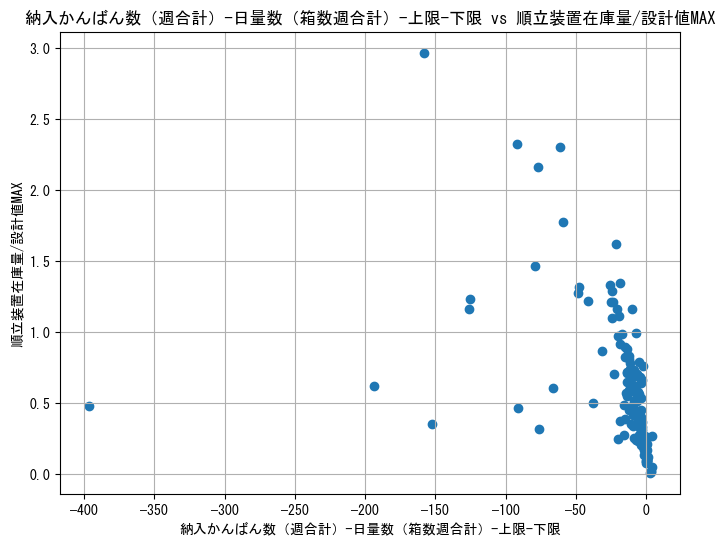

In [51]:
#中間成果物をダウンロード
data = pd.read_csv(file_path_weekly_data_with_kumitate_and_pitch_and_kotei_and_others,encoding='shift_jis')

# フォント設定の変更（日本語対応のため）
mpl.rcParams['font.family'] = 'MS Gothic'

data['納入かんばん数（週合計）-日量数（箱数週合計）'] = data['納入かんばん数'] - data['合計日量数（箱数）']
data['上限-下限'] = data['便Ave'] + data['日量数（箱数）']*data['不等ピッチ係数']

# ベクトル化された比較演算子を使用して条件を適用
data['条件チェック'] = data['納入かんばん数（週合計）-日量数（箱数週合計）'] * data['入庫数/納入数（箱数）'] - data['出庫数（箱）']> data['上限-下限']
data['条件チェック'] = data['納入かんばん数（週合計）-日量数（箱数週合計）'] * data['入庫数/納入数（箱数）']> data['上限-下限']
data['差分'] = data['納入かんばん数（週合計）-日量数（箱数週合計）'] * data['入庫数/納入数（箱数）'] - data['上限-下限']
#data['条件チェック'] = data['入庫数（箱）'] - data['出庫数（箱）']> data['上限-下限']

# TrueとFalseの数をカウント
true_count = data['条件チェック'].sum()
false_count = len(data) - true_count

print(true_count, false_count)

# '入庫数/納入数（箱数）'が1を超えている行の数をカウント
count_over_one = (data['順立装置在庫量/設計値MAX'] > 1).sum()

print(count_over_one)

# 集計したデータを新しいCSVファイルに保存します。
with open("kari.csv", mode='w',newline='', encoding='shift_jis',errors='ignore') as f:
    data.to_csv(f)
    
# 散布図の作成
plt.figure(figsize=(8, 6))
plt.scatter(data['納入かんばん数（週合計）-日量数（箱数週合計）'] * data['入庫数/納入数（箱数）'] - data['上限-下限'], data['順立装置在庫量/設計値MAX'])
plt.xlabel('納入かんばん数（週合計）-日量数（箱数週合計）-上限-下限')
plt.ylabel('順立装置在庫量/設計値MAX')
plt.title('納入かんばん数（週合計）-日量数（箱数週合計）-上限-下限 vs 順立装置在庫量/設計値MAX')
plt.grid(True)
plt.show()

In [ ]:
YY[g]

In [ ]:
import pandas as pd

# LTdata データフレームの例。これはサンプルデータであり、実際のデータに置き換えてください。
# LTdata = pd.read_csv('your_data.csv') などで読み込むことができます。

# groupby と agg を使用して集約
weekly_LTdata_1 = LTdata.groupby(['品番', '仕入先名', '年', '週番号', '基準在庫日数', 
                                  '基準在庫日数（基準在庫枚数込み）', '基準在庫枚数', '箱種類', 
                                  '納入回数（間隔）', '納入回数（回数）', '納入回数（遅れ）', '収容数']).agg({
                                      '日量数（箱数）': ['sum', 'median'],
                                      '発注〜印刷LT': 'median',
                                      '発注〜検収LT': 'median',
                                      '発注〜順立装置入庫LT': 'median', 
                                      '発注〜順立装置出庫LT': 'median', 
                                      '発注〜回収LT': 'median'
                                  })

# 結果の表示
weekly_LTdata_1.head()

In [63]:
import pandas as pd
import os

# 分割したいCSVファイルのパスを指定します
csv_file_path = '生データ/所在管理MB/明細表_所在管理_リードタイム_20240125184429.csv'

# CSVファイルを読み込みます
df = pd.read_csv(csv_file_path,encoding='shift_jis')

# 分割する行数を計算します
total_rows = len(df)
chunk_size = total_rows // 10

# 分割したCSVファイルを保存するディレクトリを作成します
output_directory = '生データ/所在管理MB'
os.makedirs(output_directory, exist_ok=True)

# 分割したCSVファイルを保存します
for i, start in enumerate(range(0, total_rows, chunk_size)):
    end = start + chunk_size
    chunk = df[start:end]
    chunk.to_csv(f'{output_directory}/所在管理_{i+1}.csv', index=False,encoding='shift_jis')
    
    
#------------------------------------------------------------------------------------------------
    
# 分割したいCSVファイルのパスを指定します
csv_file_path = '生データ/組立実績MB/組立稼働率（実績）_20240125192300.csv'

# CSVファイルを読み込みます
df = pd.read_csv(csv_file_path,encoding='cp932')

# 分割する行数を計算します
total_rows = len(df)
chunk_size = total_rows // 10

# 分割したCSVファイルを保存するディレクトリを作成します
output_directory = '生データ/組立実績MB'
os.makedirs(output_directory, exist_ok=True)

# 分割したCSVファイルを保存します
for i, start in enumerate(range(0, total_rows, chunk_size)):
    end = start + chunk_size
    chunk = df[start:end]
    chunk.to_csv(f'{output_directory}/組立実績_{i+1}.csv', index=False,encoding='cp932')

Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
